In [ ]:
import pandas as pd
import utils

### Number of observations / variables in the dataset

In [27]:
pd.read_csv('outs/summary_1_1.csv', index_col=0)

,num obs,num variables
train,72208,5000
test,18052,5000


### Histograms of the data (capped)

#### preprocessed train

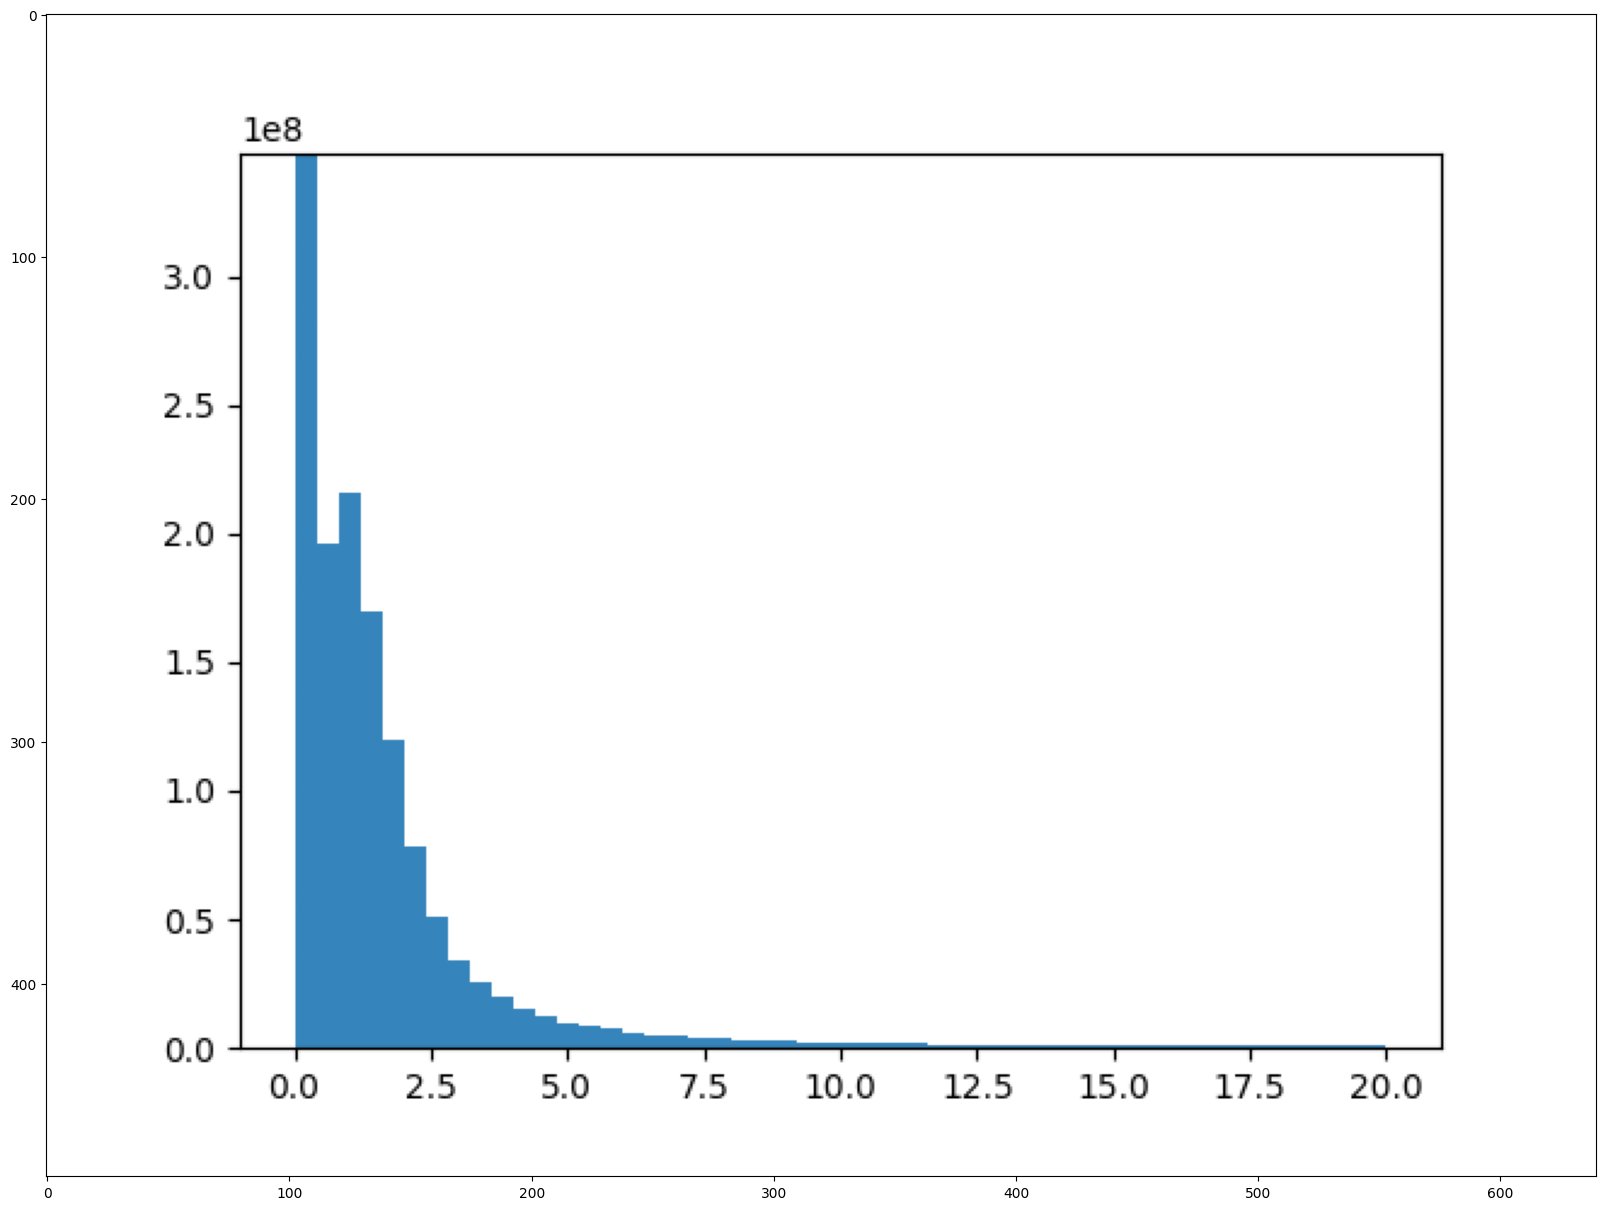

In [18]:
utils.show_image('outs/hists_1/hist1.png')

#### raw train

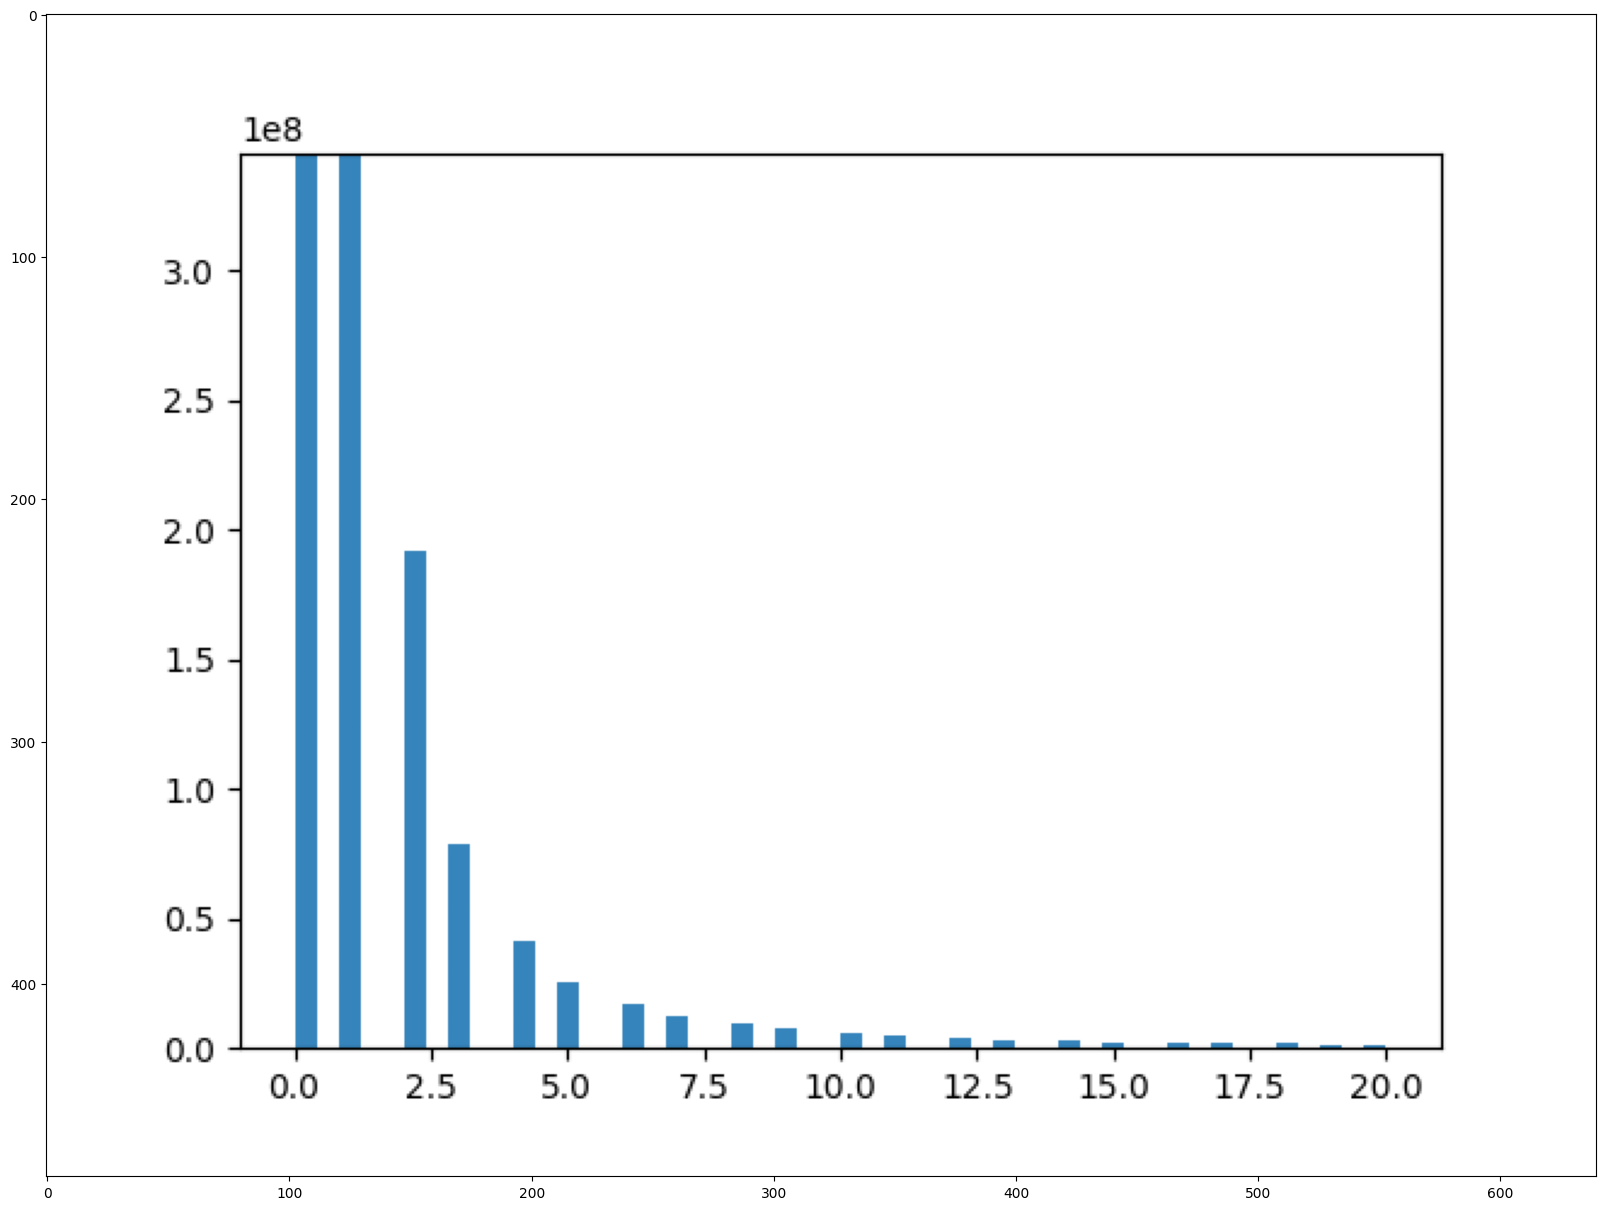

In [20]:
utils.show_image('outs/hists_1/hist2.png')

#### preprocessed test

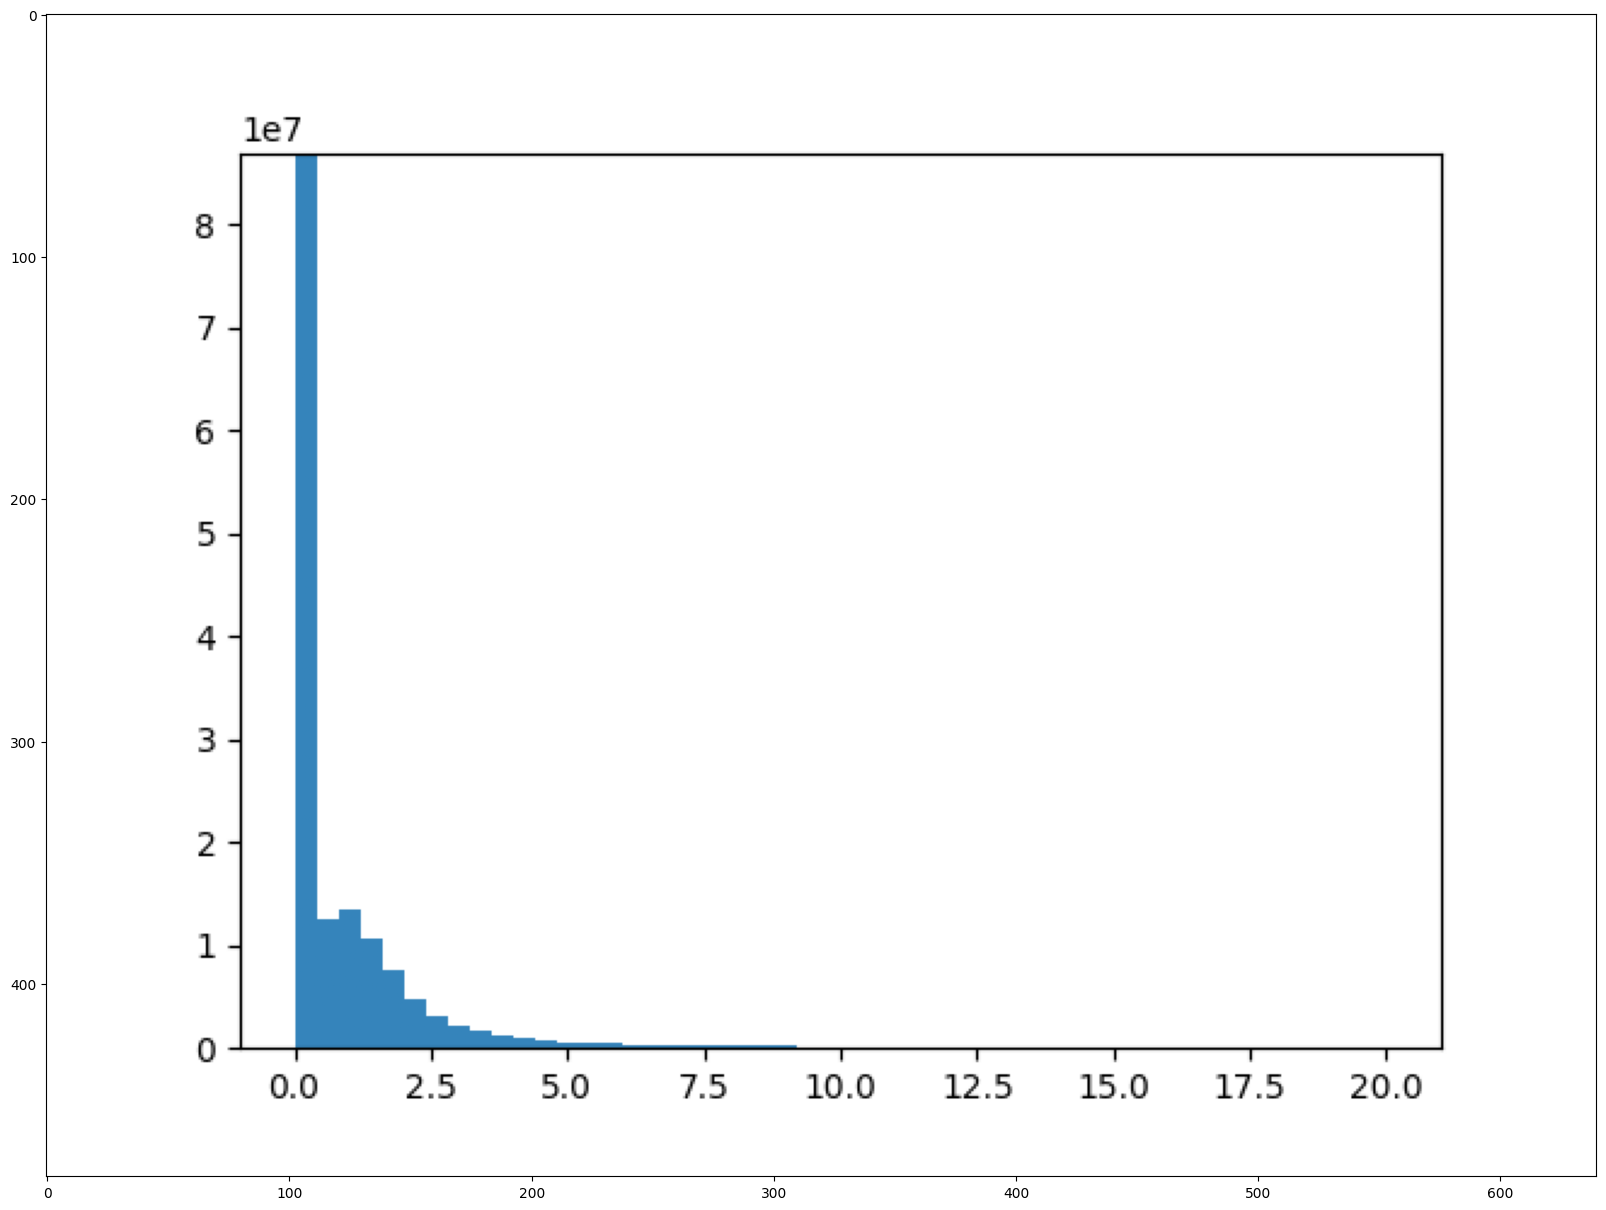

In [21]:
utils.show_image('outs/hists_1/hist3.png')

#### raw test

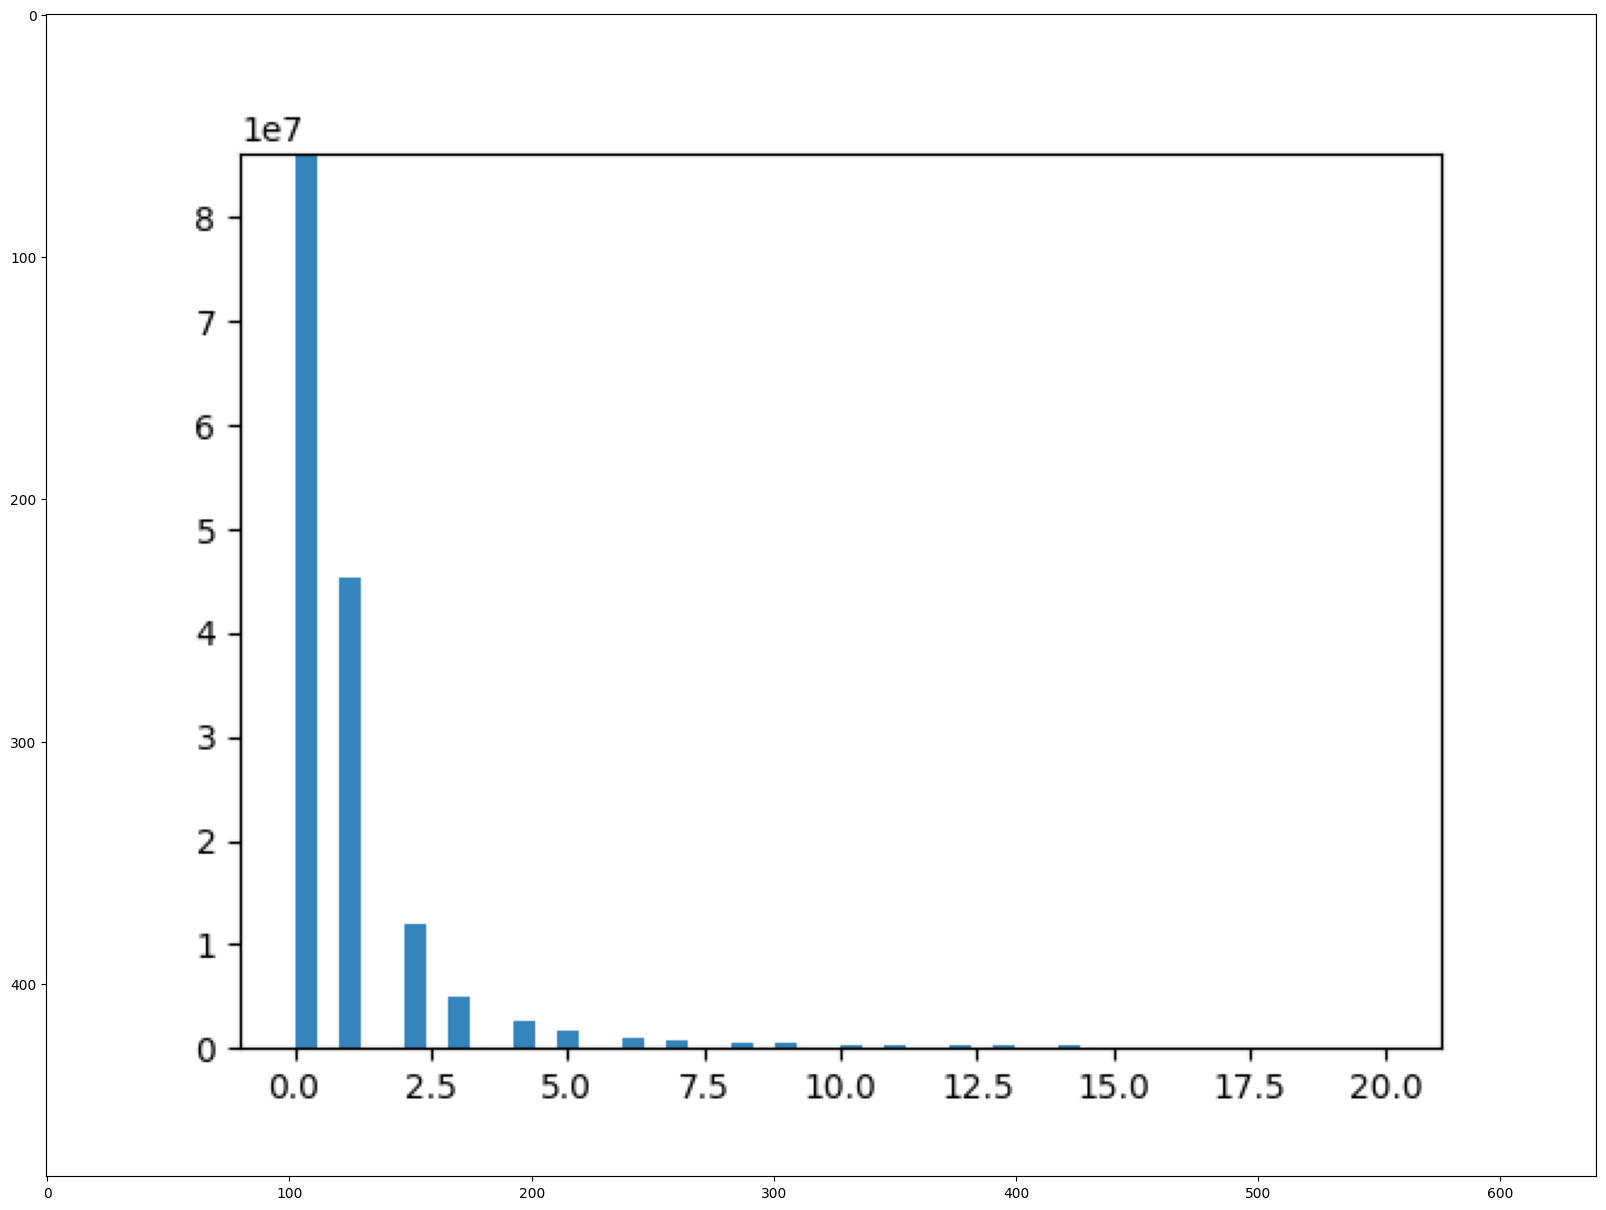

In [22]:
utils.show_image('outs/hists_1/hist4.png')

### Data preprocessing

Data was preprocessed by dividing it by the GEX_size_factors variable in the obs

### Histograms with zeros left out (capped as well)

#### preprocessed train

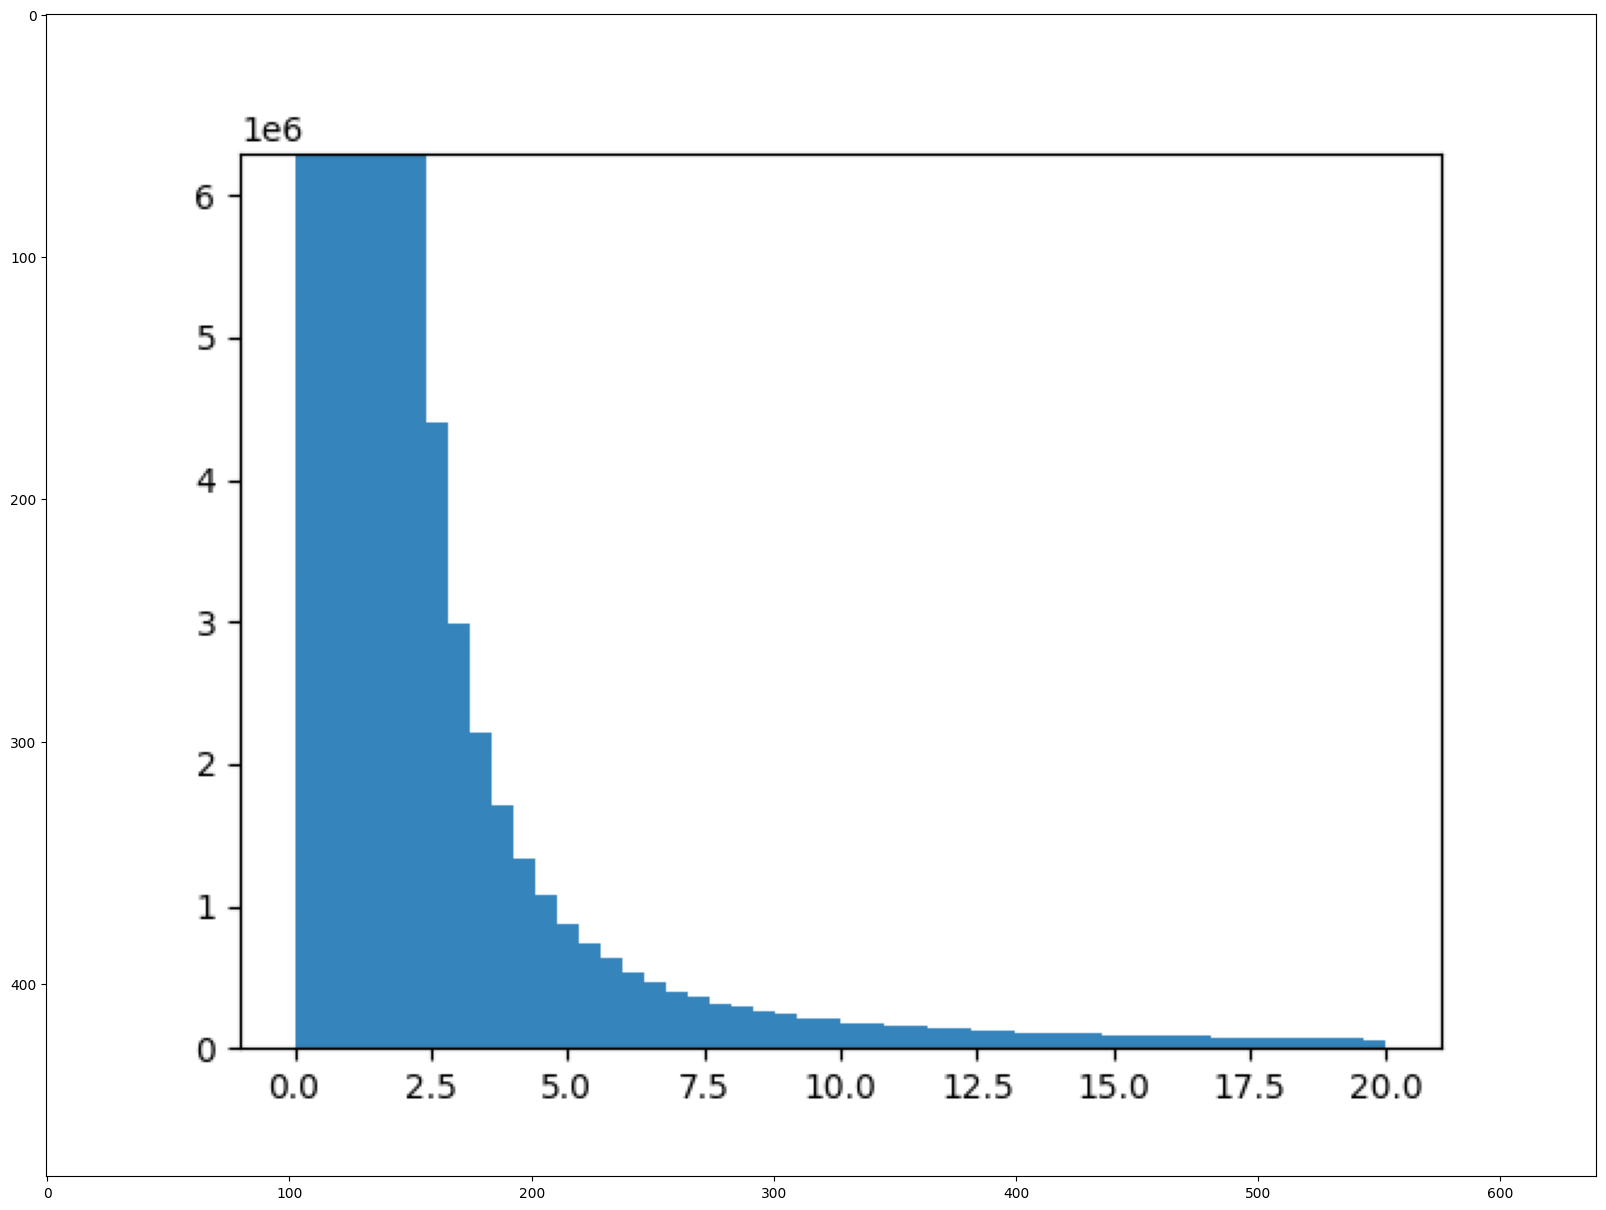

In [23]:
utils.show_image('outs/hists_2/hist1.png')

#### raw train

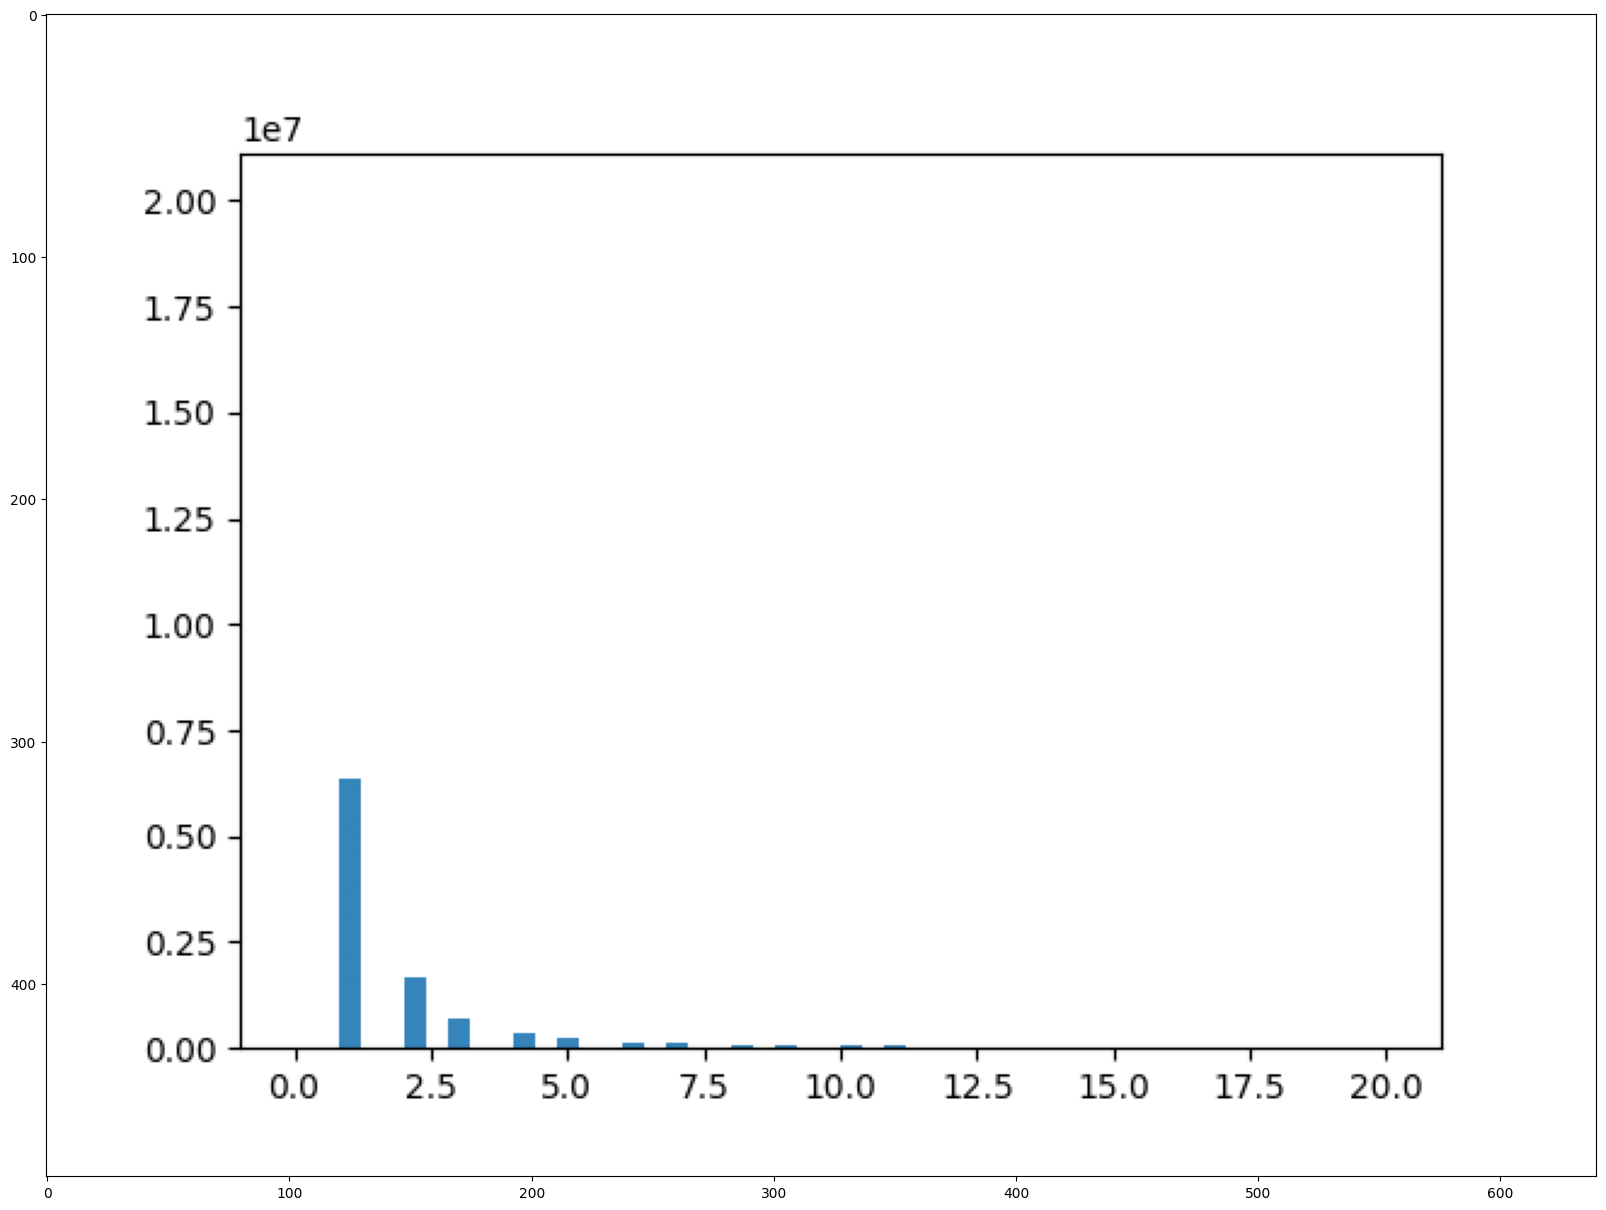

In [24]:
utils.show_image('outs/hists_2/hist2.png')

#### preprocessed test

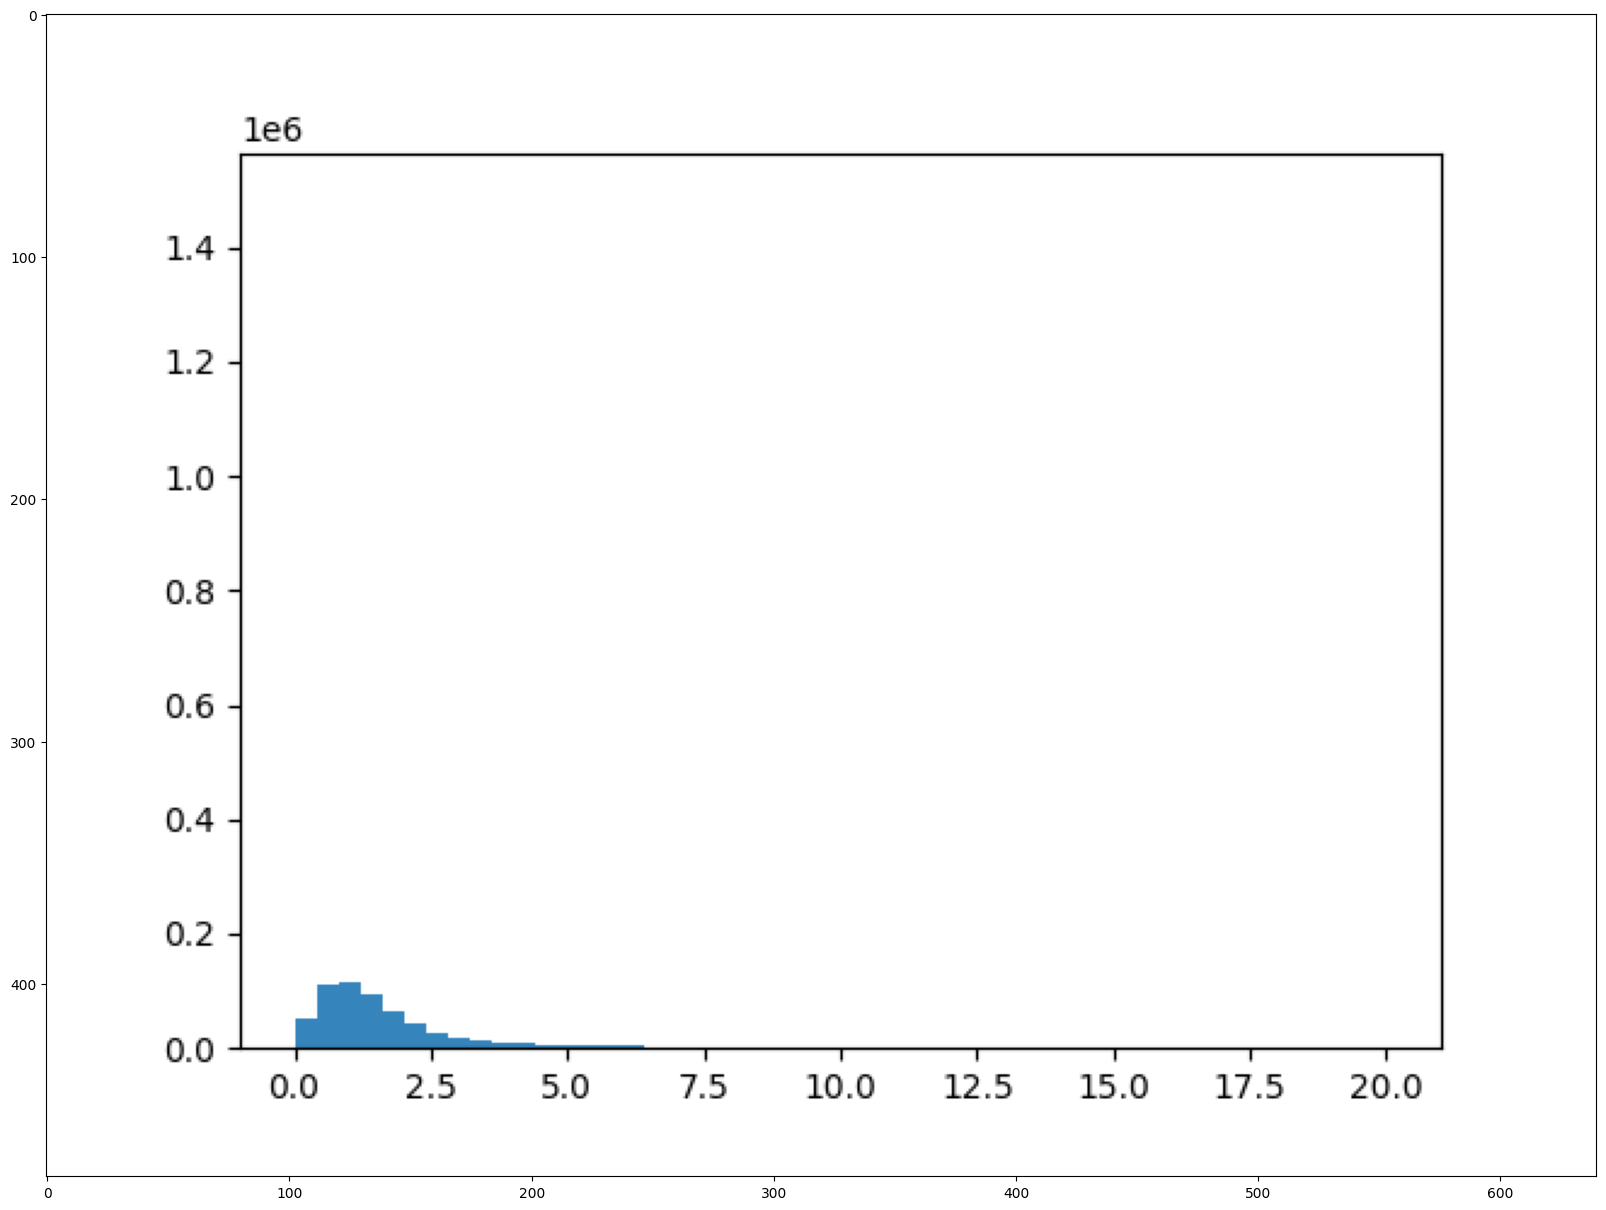

In [25]:
utils.show_image('outs/hists_2/hist3.png')

#### raw test

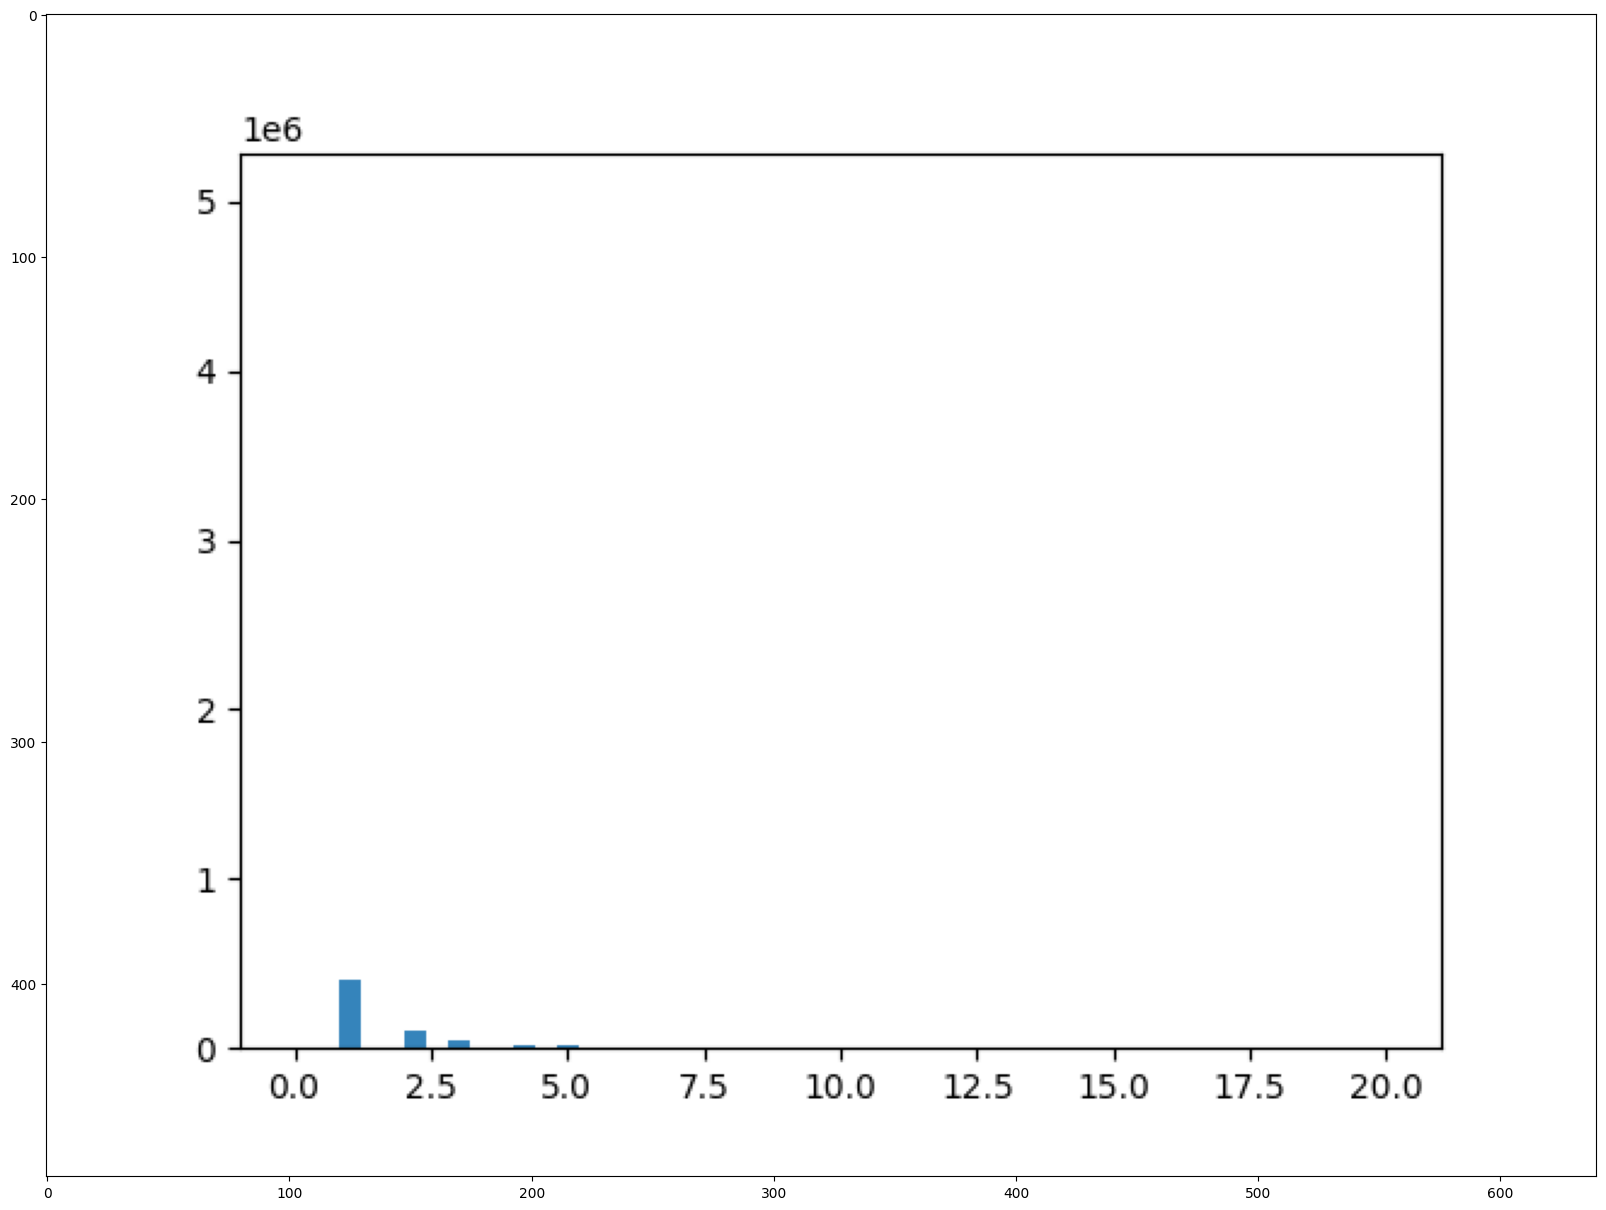

In [26]:
utils.show_image('outs/hists_2/hist4.png')

### What is the distribution of the data

At first it seems that a poisson distribution would be sufficient. (which is common in RNA modelling, according to my almost nonexistent biological knowledge).

However due to the variance being larger than the mean (and a lot of zeros present) it is wise to suggest a negative binomial distribution (which is tightly connected to poisson distribution)

### What are the contexts of the adata.obs

additional, explanatory information for each observation. Biological details about RNA sequences and the patients

### number of categories (donors, sites, cell types)

In [28]:
pd.read_csv('outs/summary_1_6.csv', index_col=0)

,n_donors,n_sites,n_cell_types
0,9,4,45


### Training of the vanilla VAE (latent size of 32, 10 epochs, 128 batch size, 4 hidden layers of width 256 in encoder/decoder)

#### ELBO

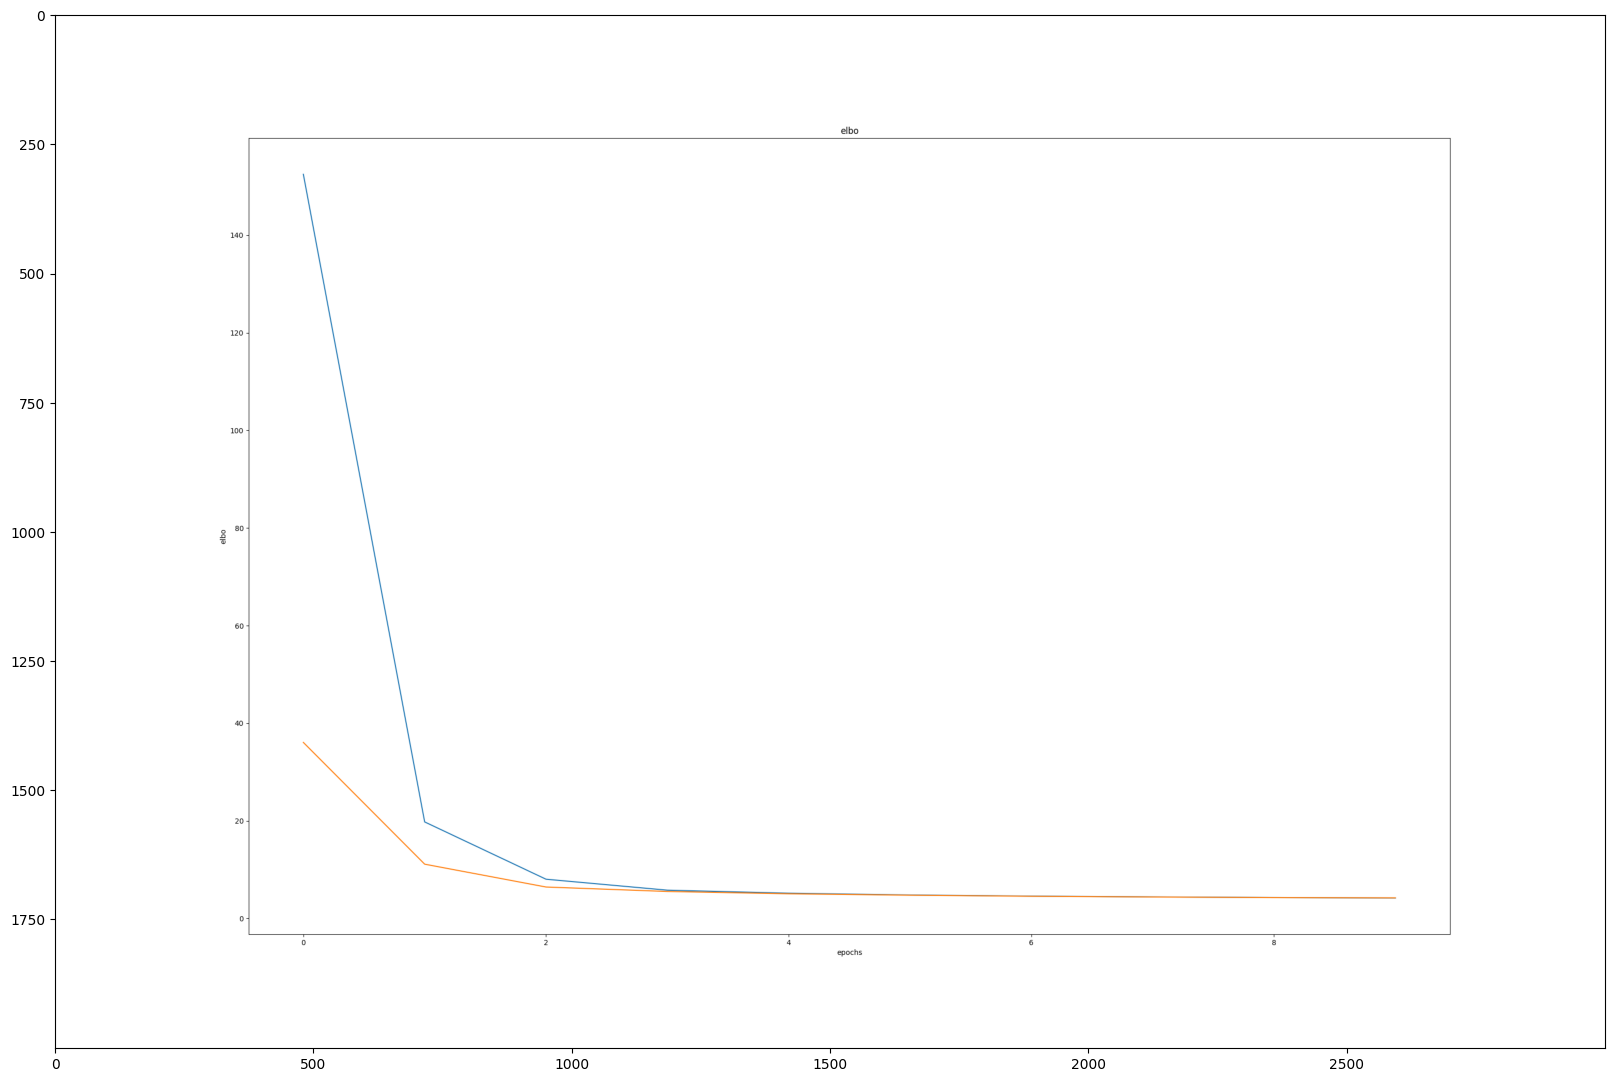

In [101]:
utils.show_image('outs/vanilla_vae/elbo_1.png')

#### reconstruction loss

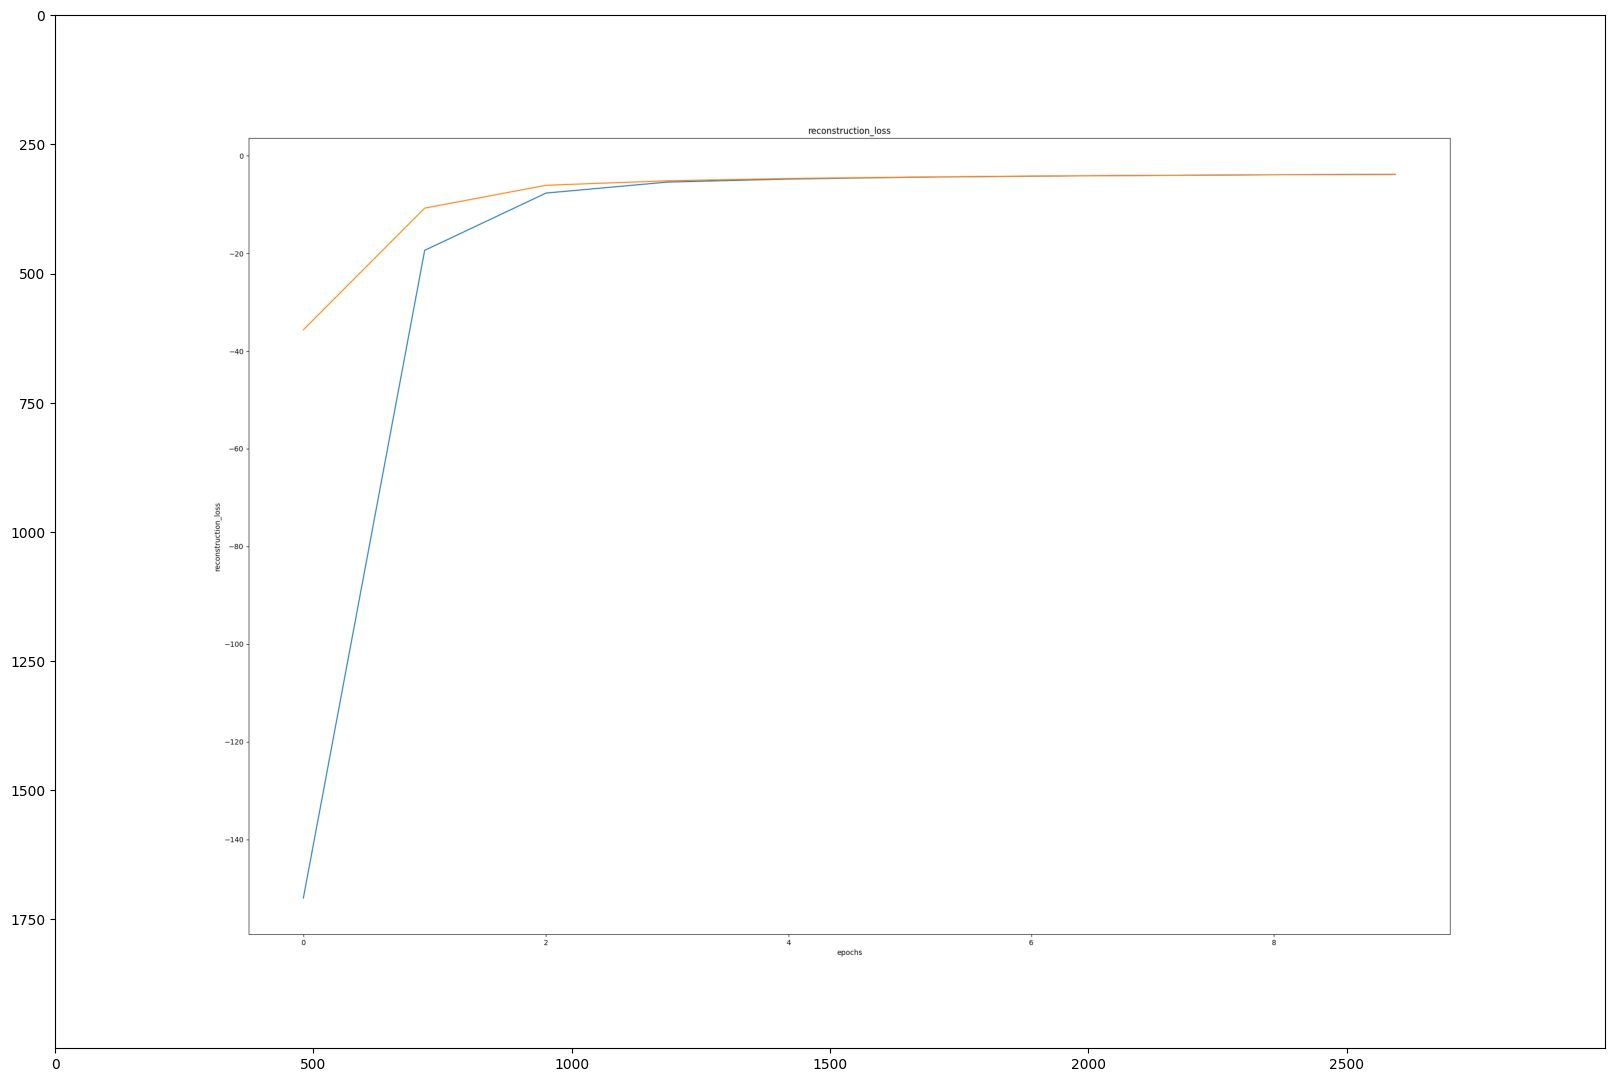

In [102]:
utils.show_image('outs/vanilla_vae/reconstruction_loss_1.png')

#### KL divergence

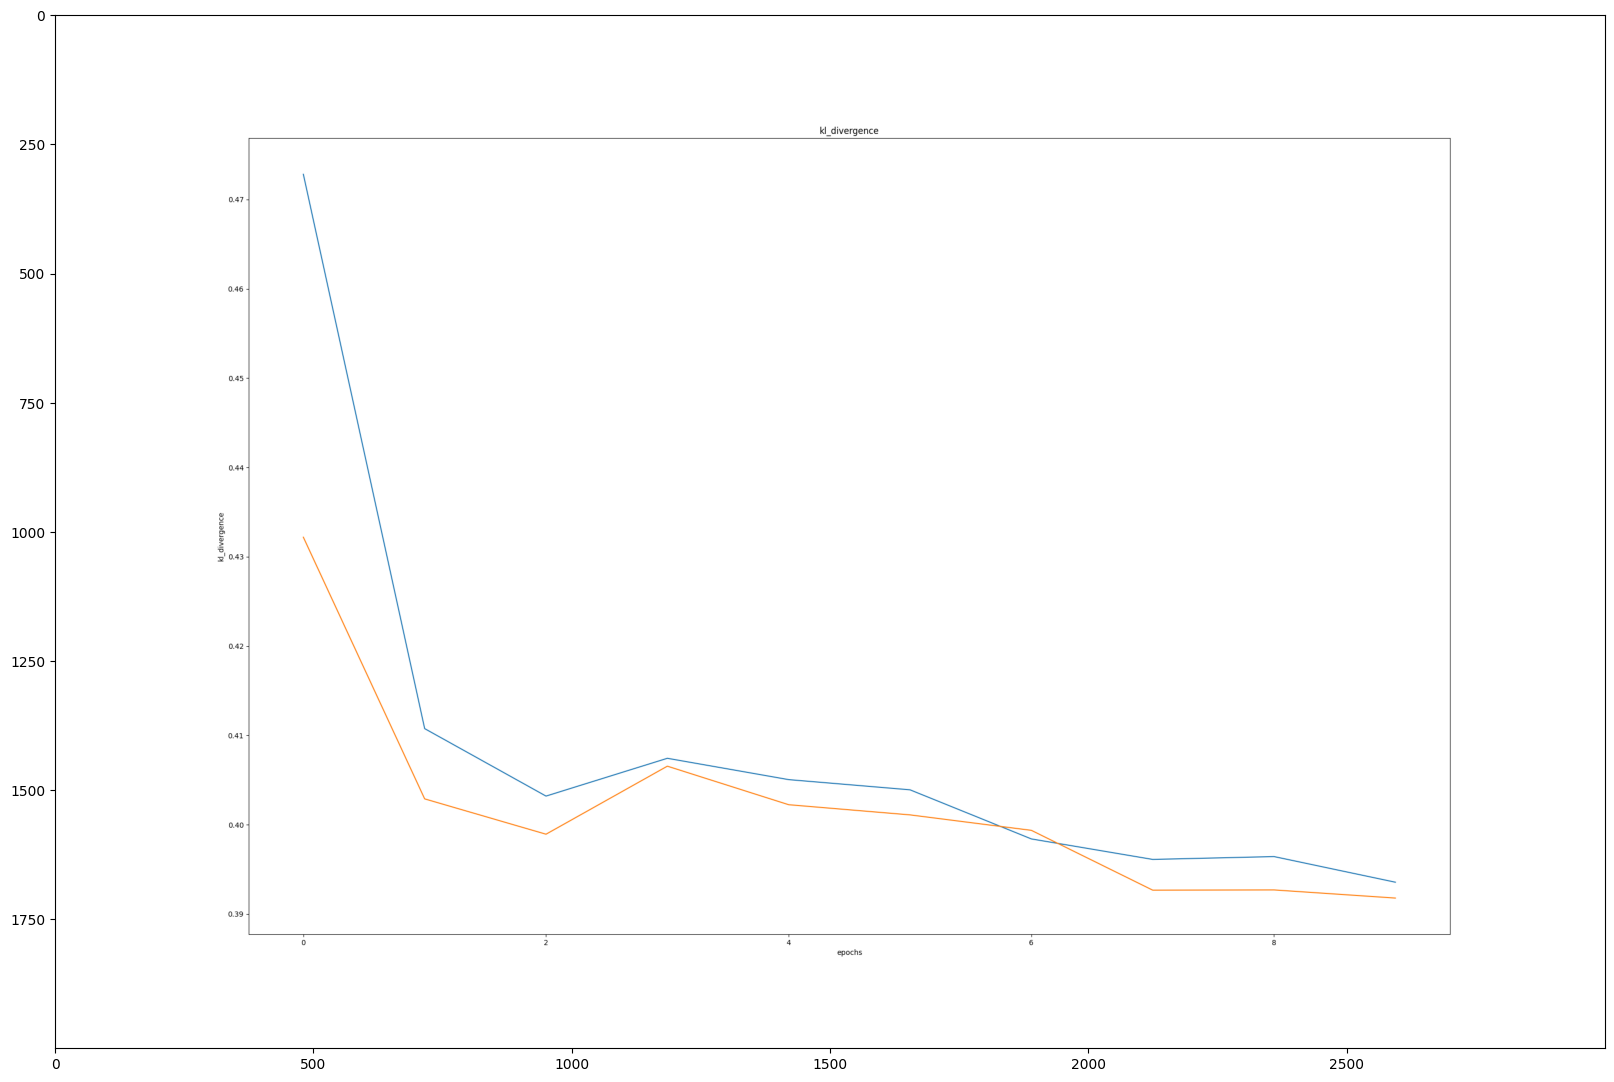

In [103]:
utils.show_image('outs/vanilla_vae/kl_divergence_1.png')

### 3 runs with different latent sizes (and minimum number of PCA components to reach 95% variance explained)

In [104]:
pd.read_csv('outs/vanilla_vae/3pca.csv', index_col=0)

,latent_size,elbo,kl divergence,recon loss,min components,explained_variance
0,32,4.220623,0.391793,3.828830,31,0.971123
1,16,4.306129,0.421133,3.884996,16,1.000000
2,8,4.416090,0.460025,3.956065,8,1.000000


### 2-PCA for the 32-dimensional latent_size, coloured cell types

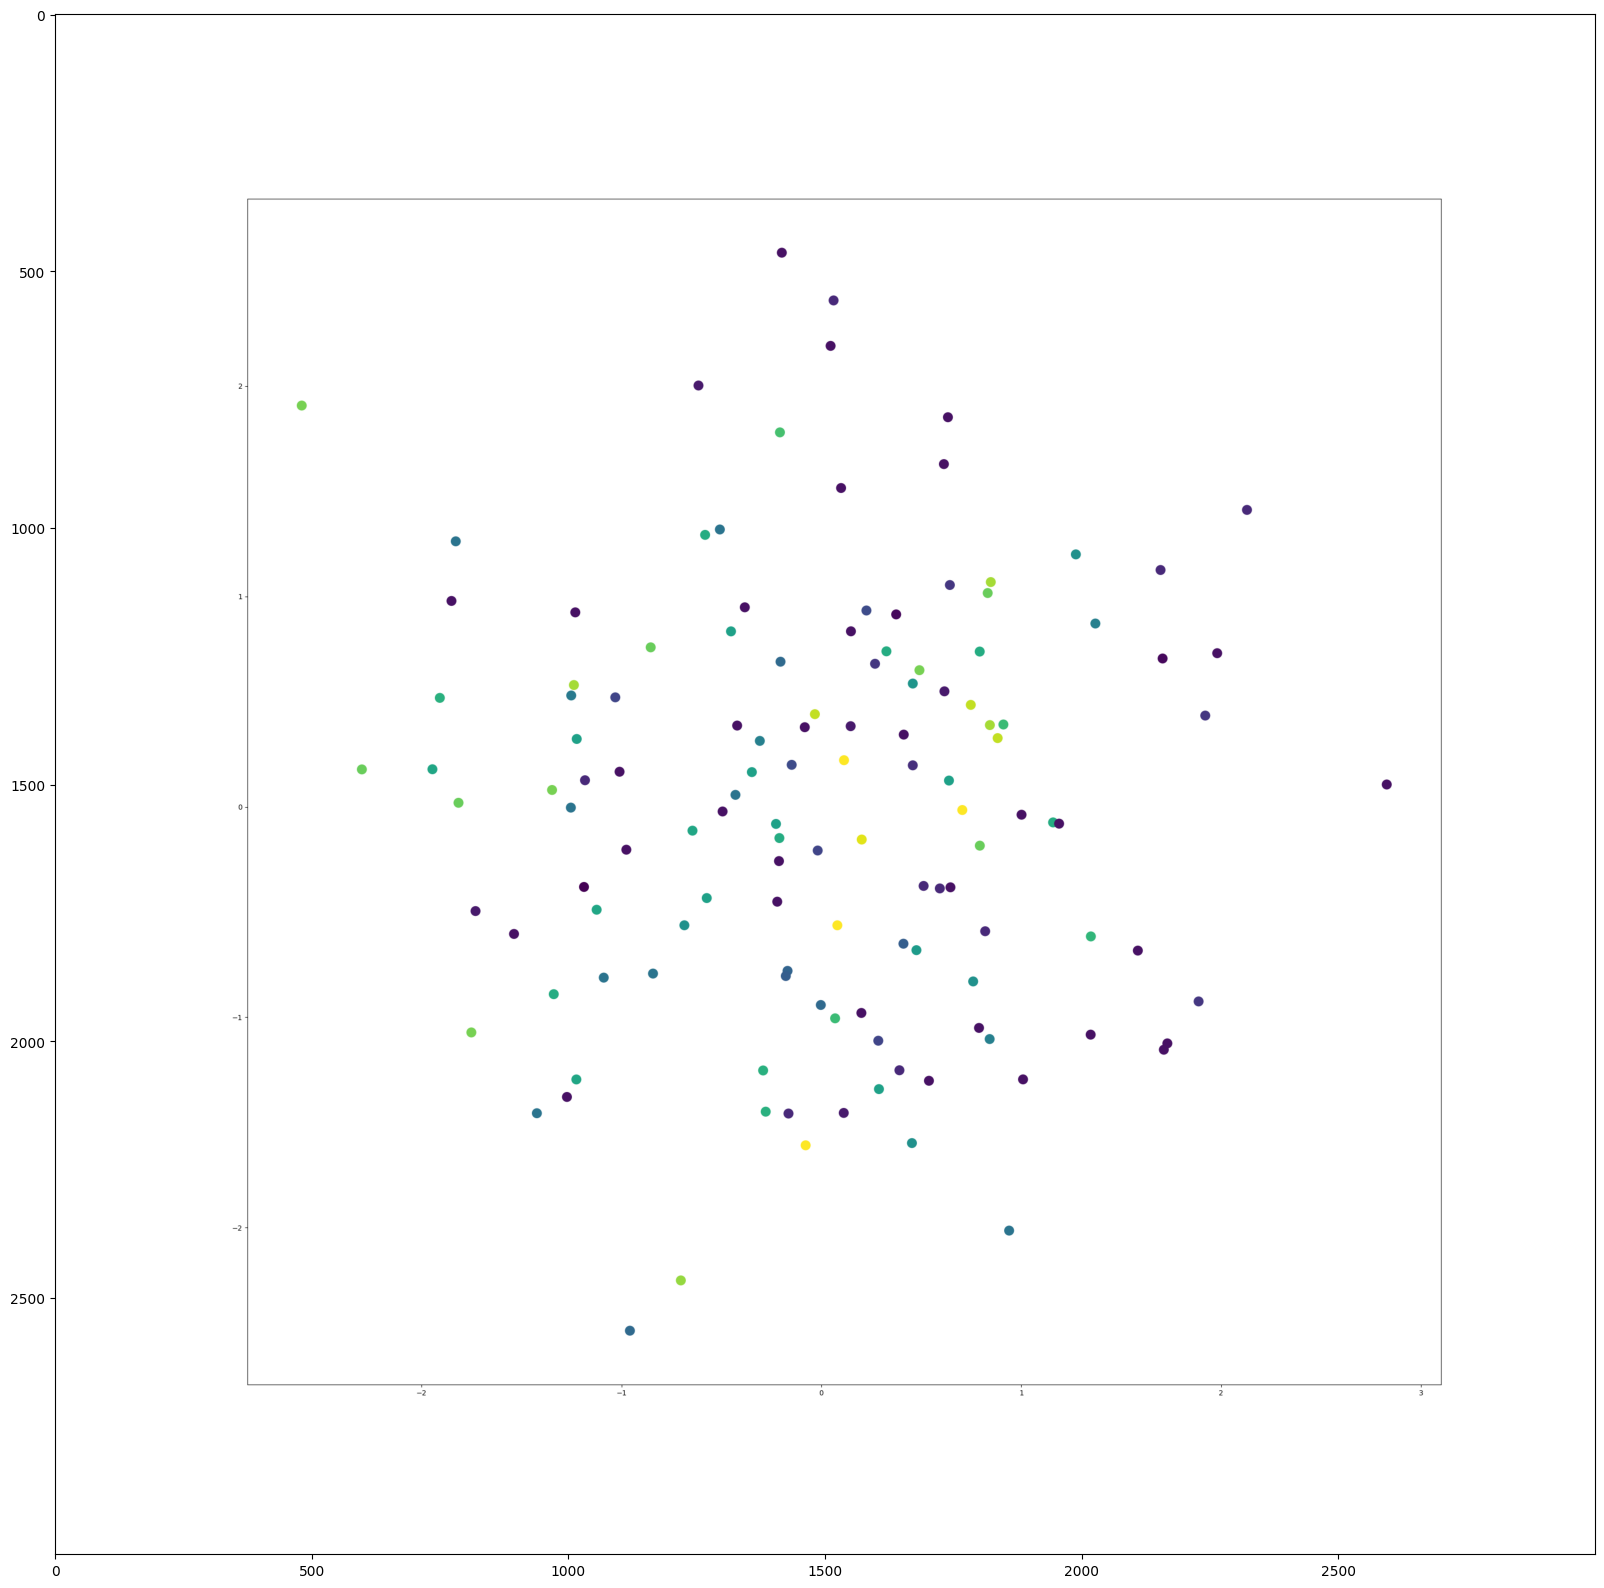

In [106]:
utils.show_image('outs/vanilla_vae/pca_scatter_1_cell_type.png')

### Overall thoughts of the training

I chose to use the raw dataset, since there was no clear empirical benefit of using the preprocessed dataset. I'll be using the raw data (integers) for the custom decoder as well. That way it'll be easier to compare both methods.

I used latent_size of 32, since it performed better on the test set than 128, 64, 16 or 8. I used 10 epochs and such latent sizes for the training times to not be too long (while training on cpu).

### Custom decoder

Negative binomial decoder results in few times lower ELBO, reconstruction loss is much lower and KL divergence is slightly lower as well.

I chose that distribution mainly because the data resembles it a lot.

#### ELBO

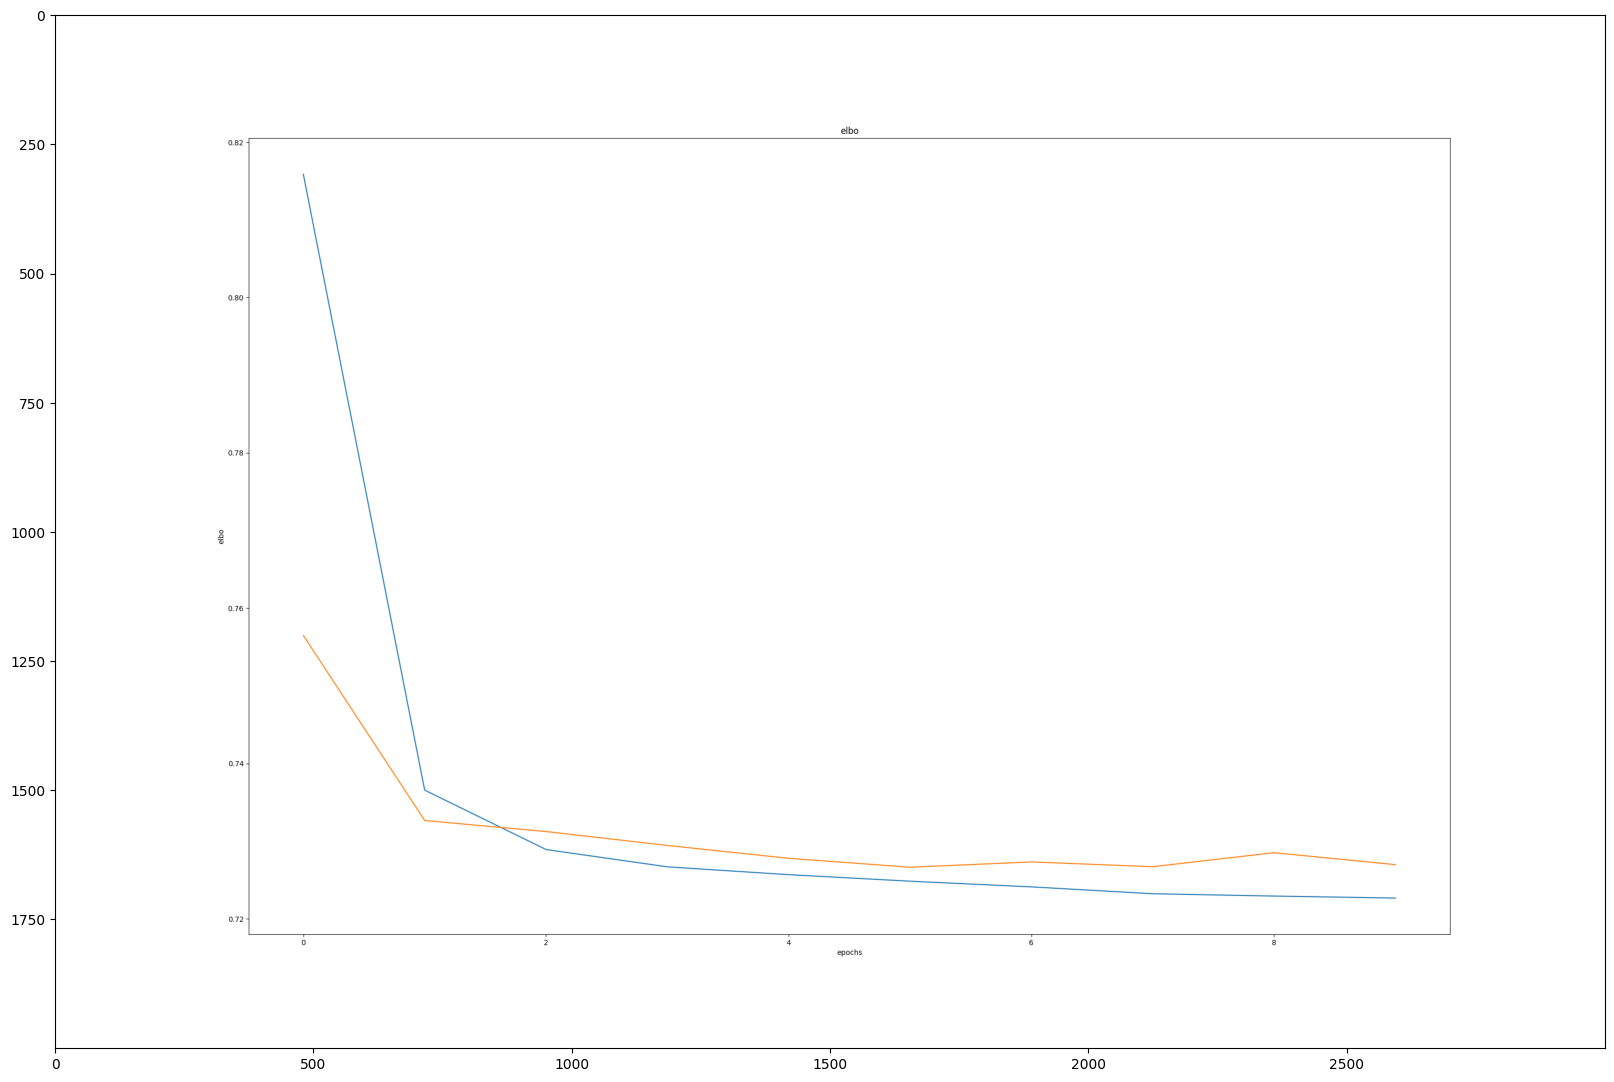

In [108]:
utils.show_image('outs/custom_vae/elbo_1.png')

#### reconstruction loss

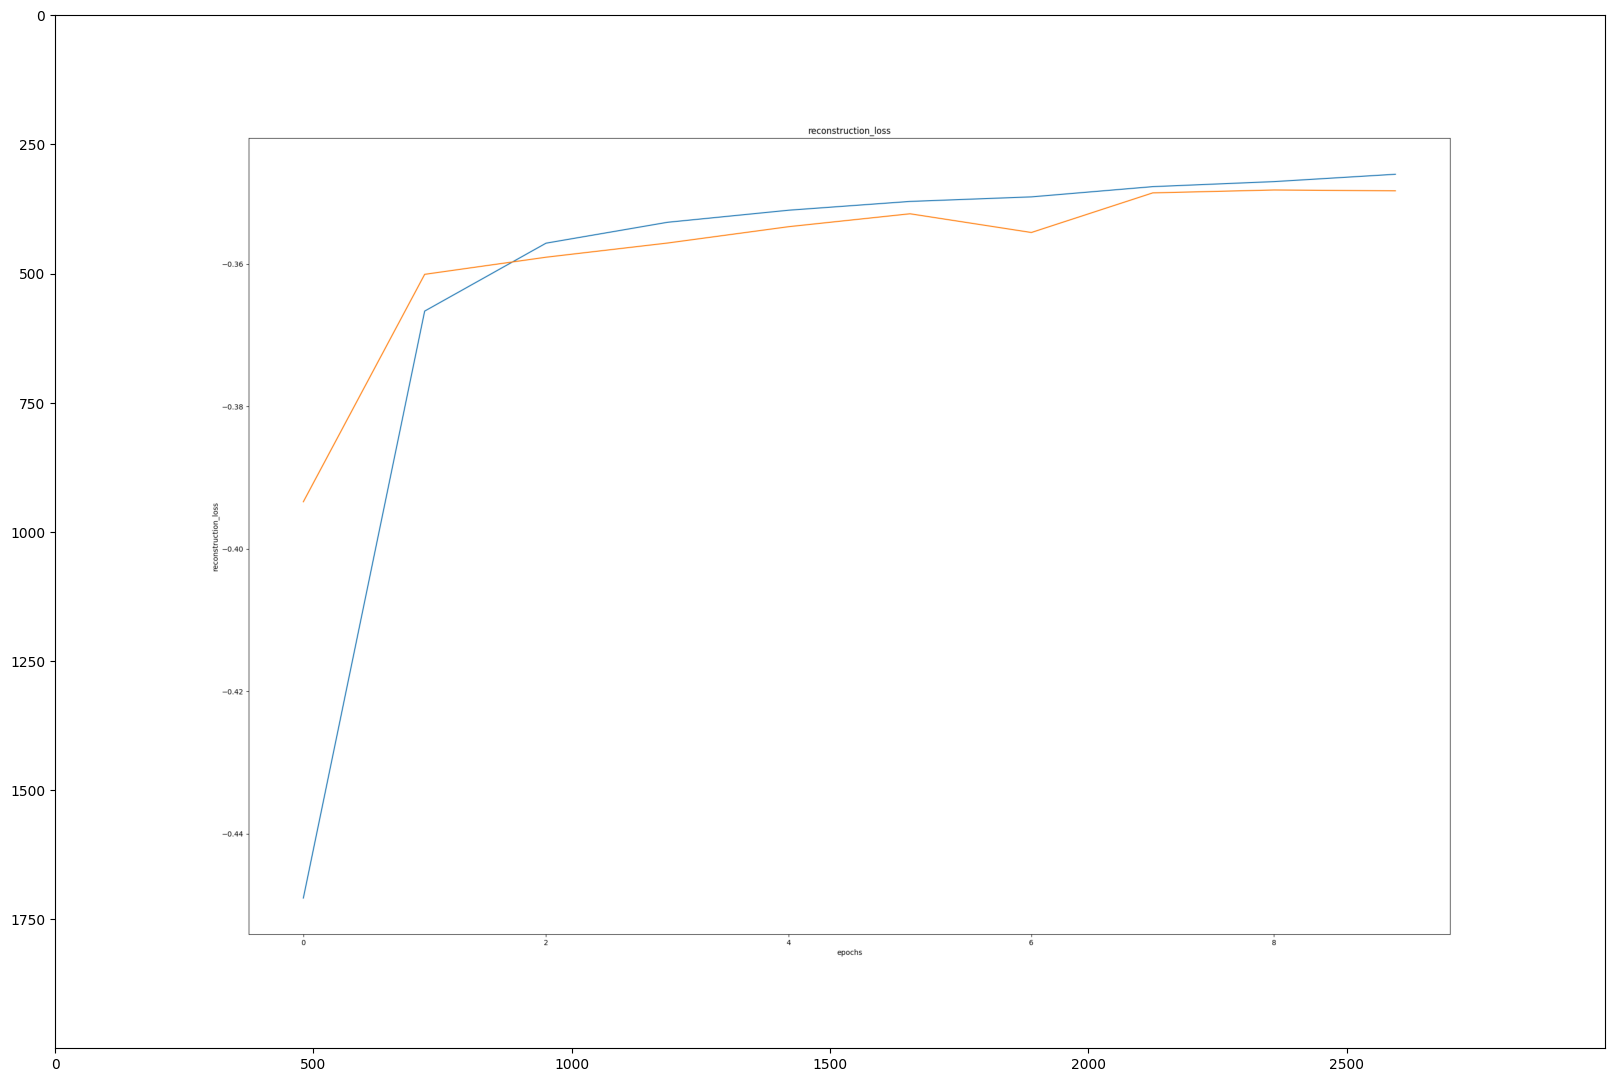

In [109]:
utils.show_image('outs/custom_vae/reconstruction_loss_1.png')

#### KL divergence

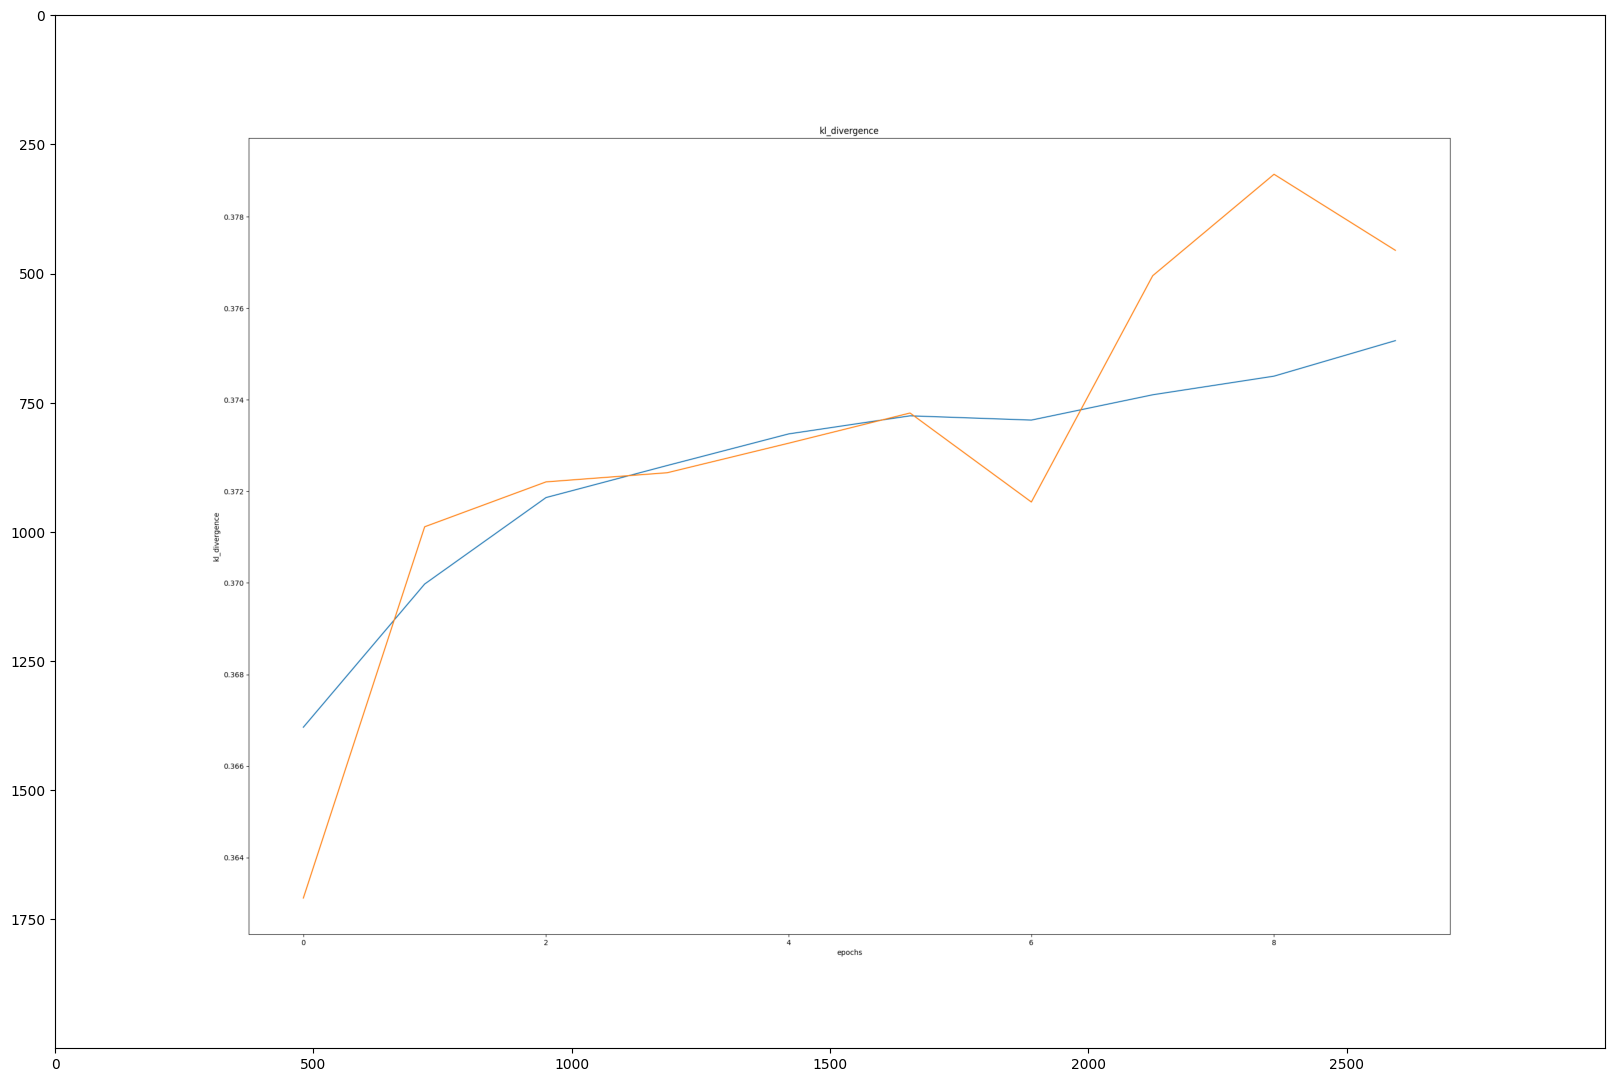

In [111]:
utils.show_image('outs/custom_vae/kl_divergence_1.png')

### 2-PCA for 32-latent_dim custom VAE, coloured cell type

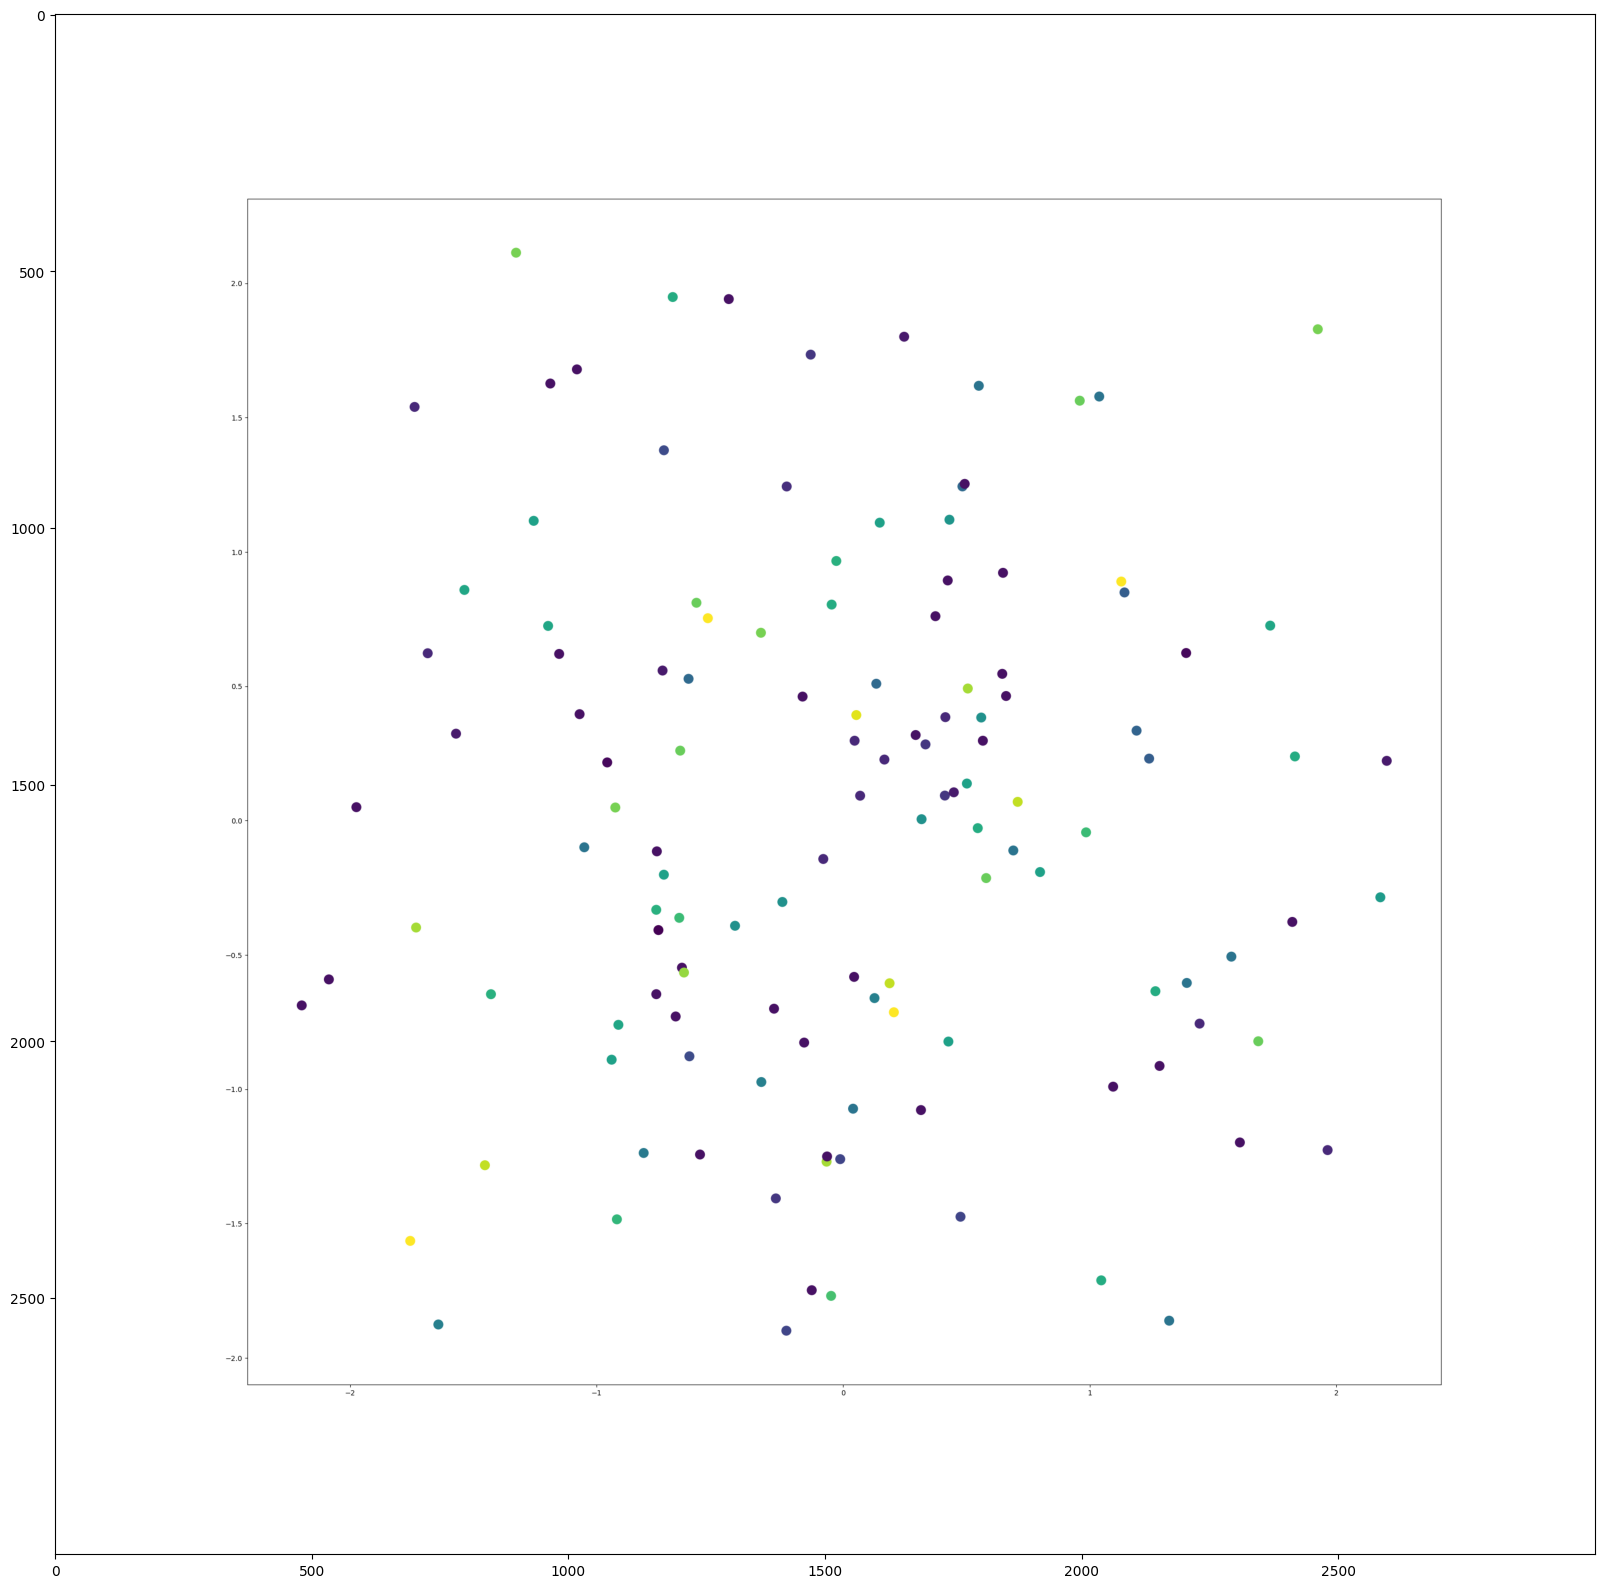

In [113]:
utils.show_image('outs/custom_vae/pca_scatter_1_cell_type.png')

### 2-PCA for 32-latent_dim vanilla VAE, coloured donor id

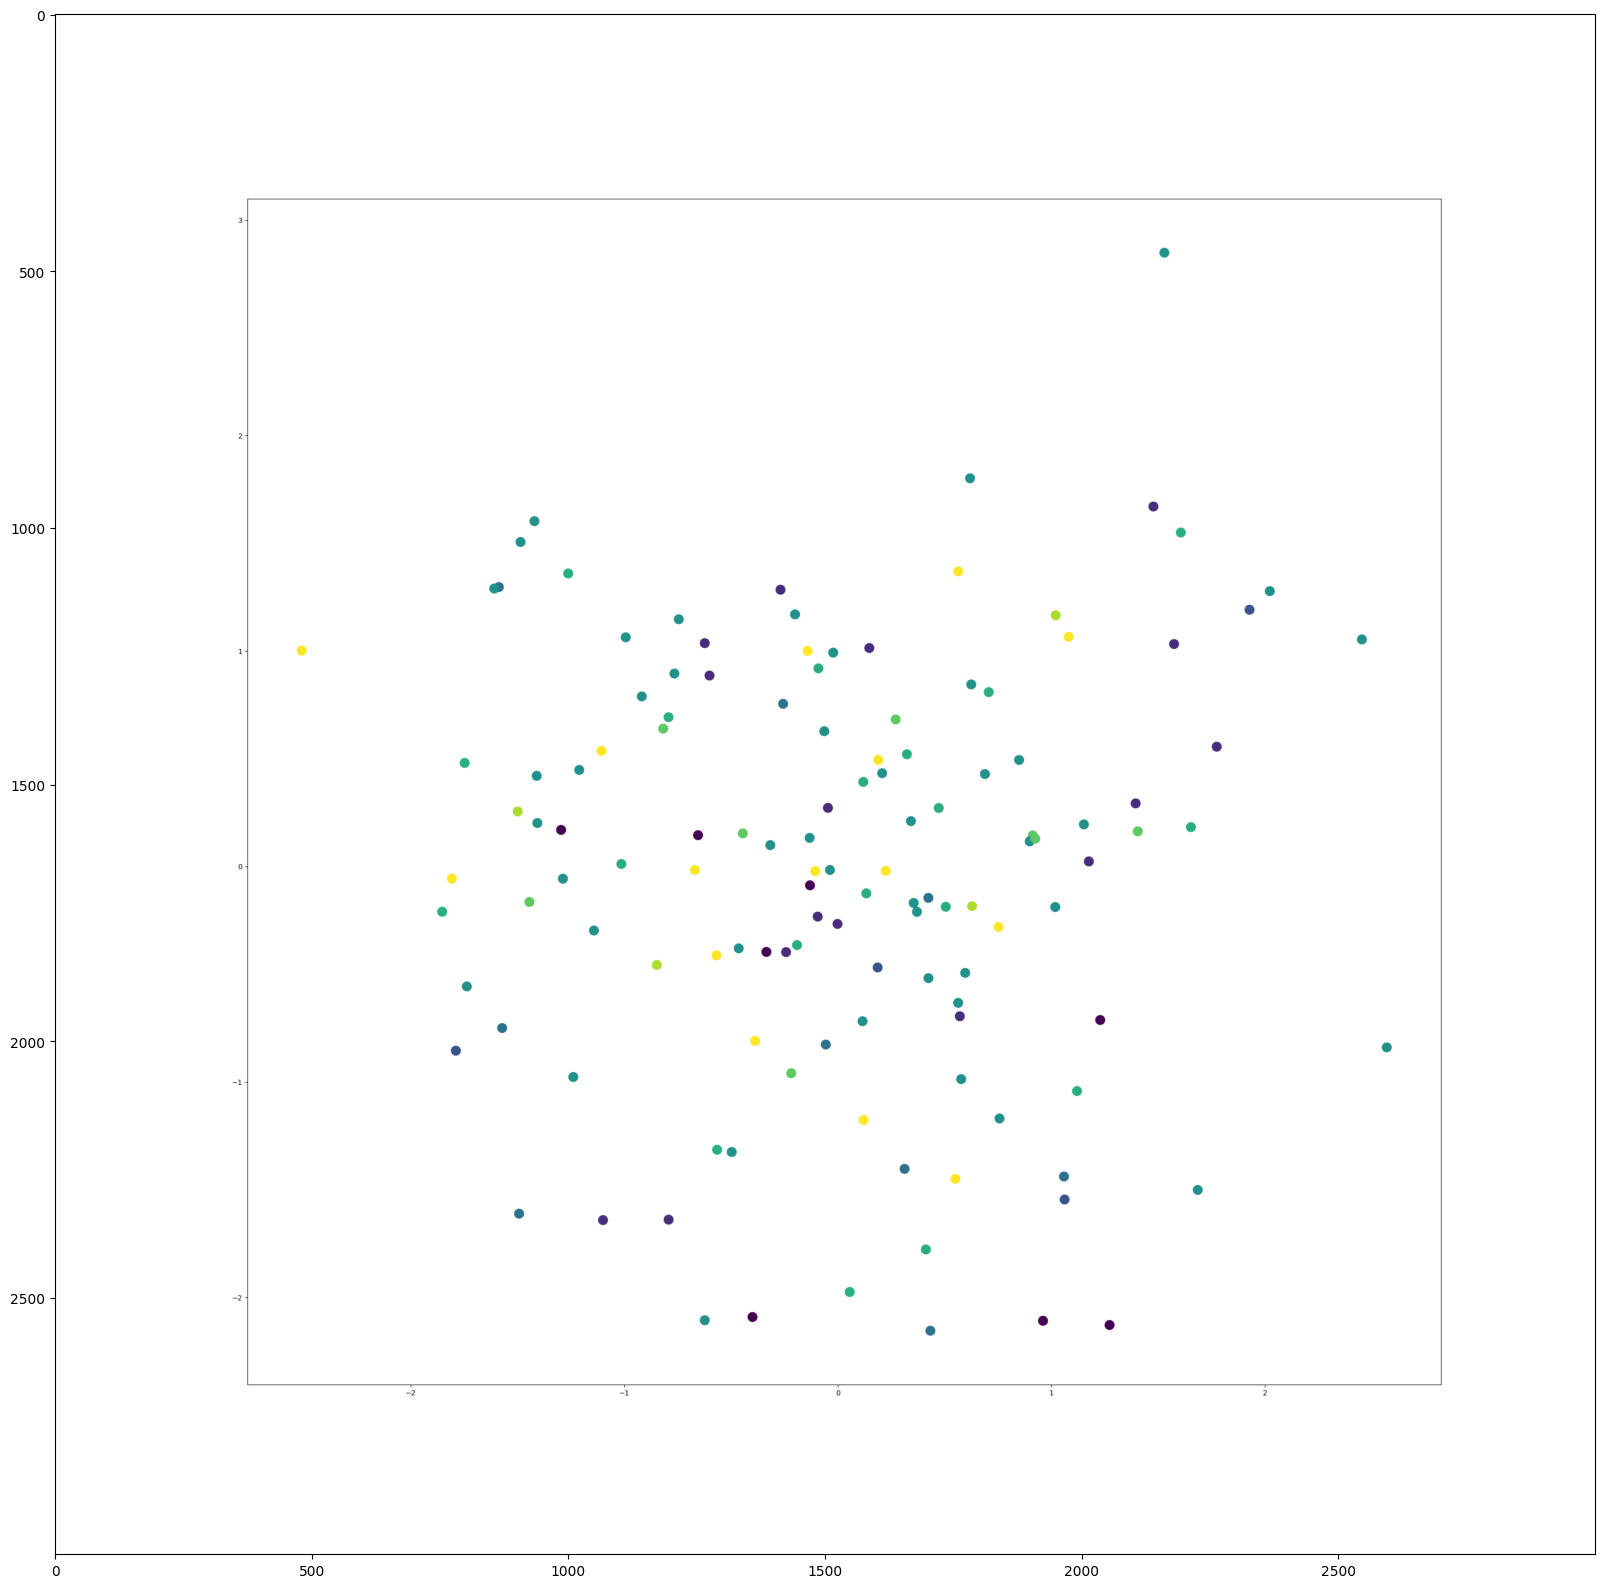

In [114]:
utils.show_image('outs/vanilla_vae/pca_scatter_1_donor_id.png')

### 2-PCA for 32-latent_dim vanilla VAE, coloured site

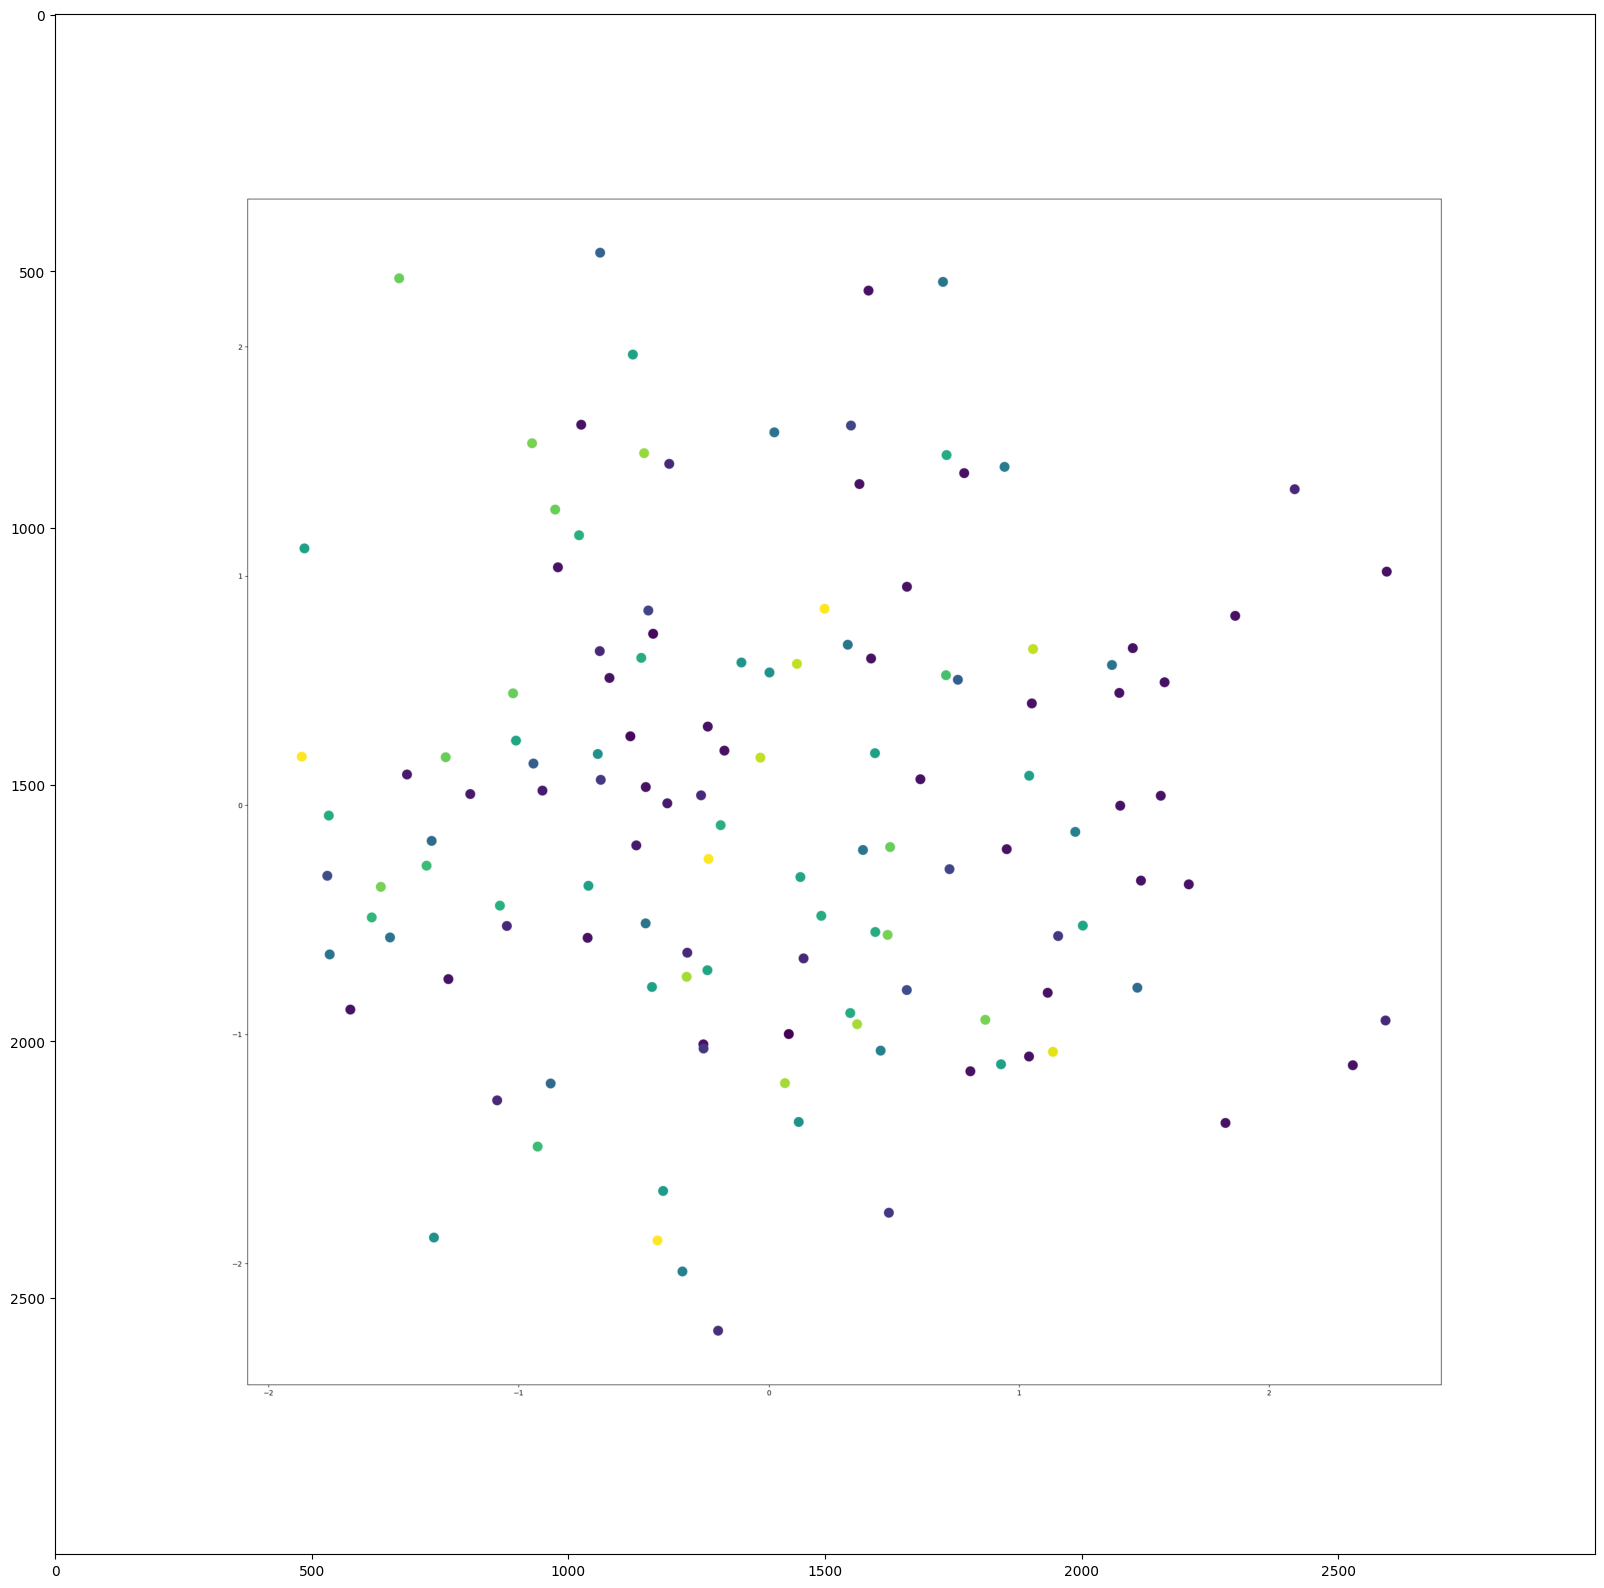

In [115]:
utils.show_image('outs/vanilla_vae/pca_scatter_1_site.png')

### 2-PCA for 32-latent_dim custom VAE, coloured donor id

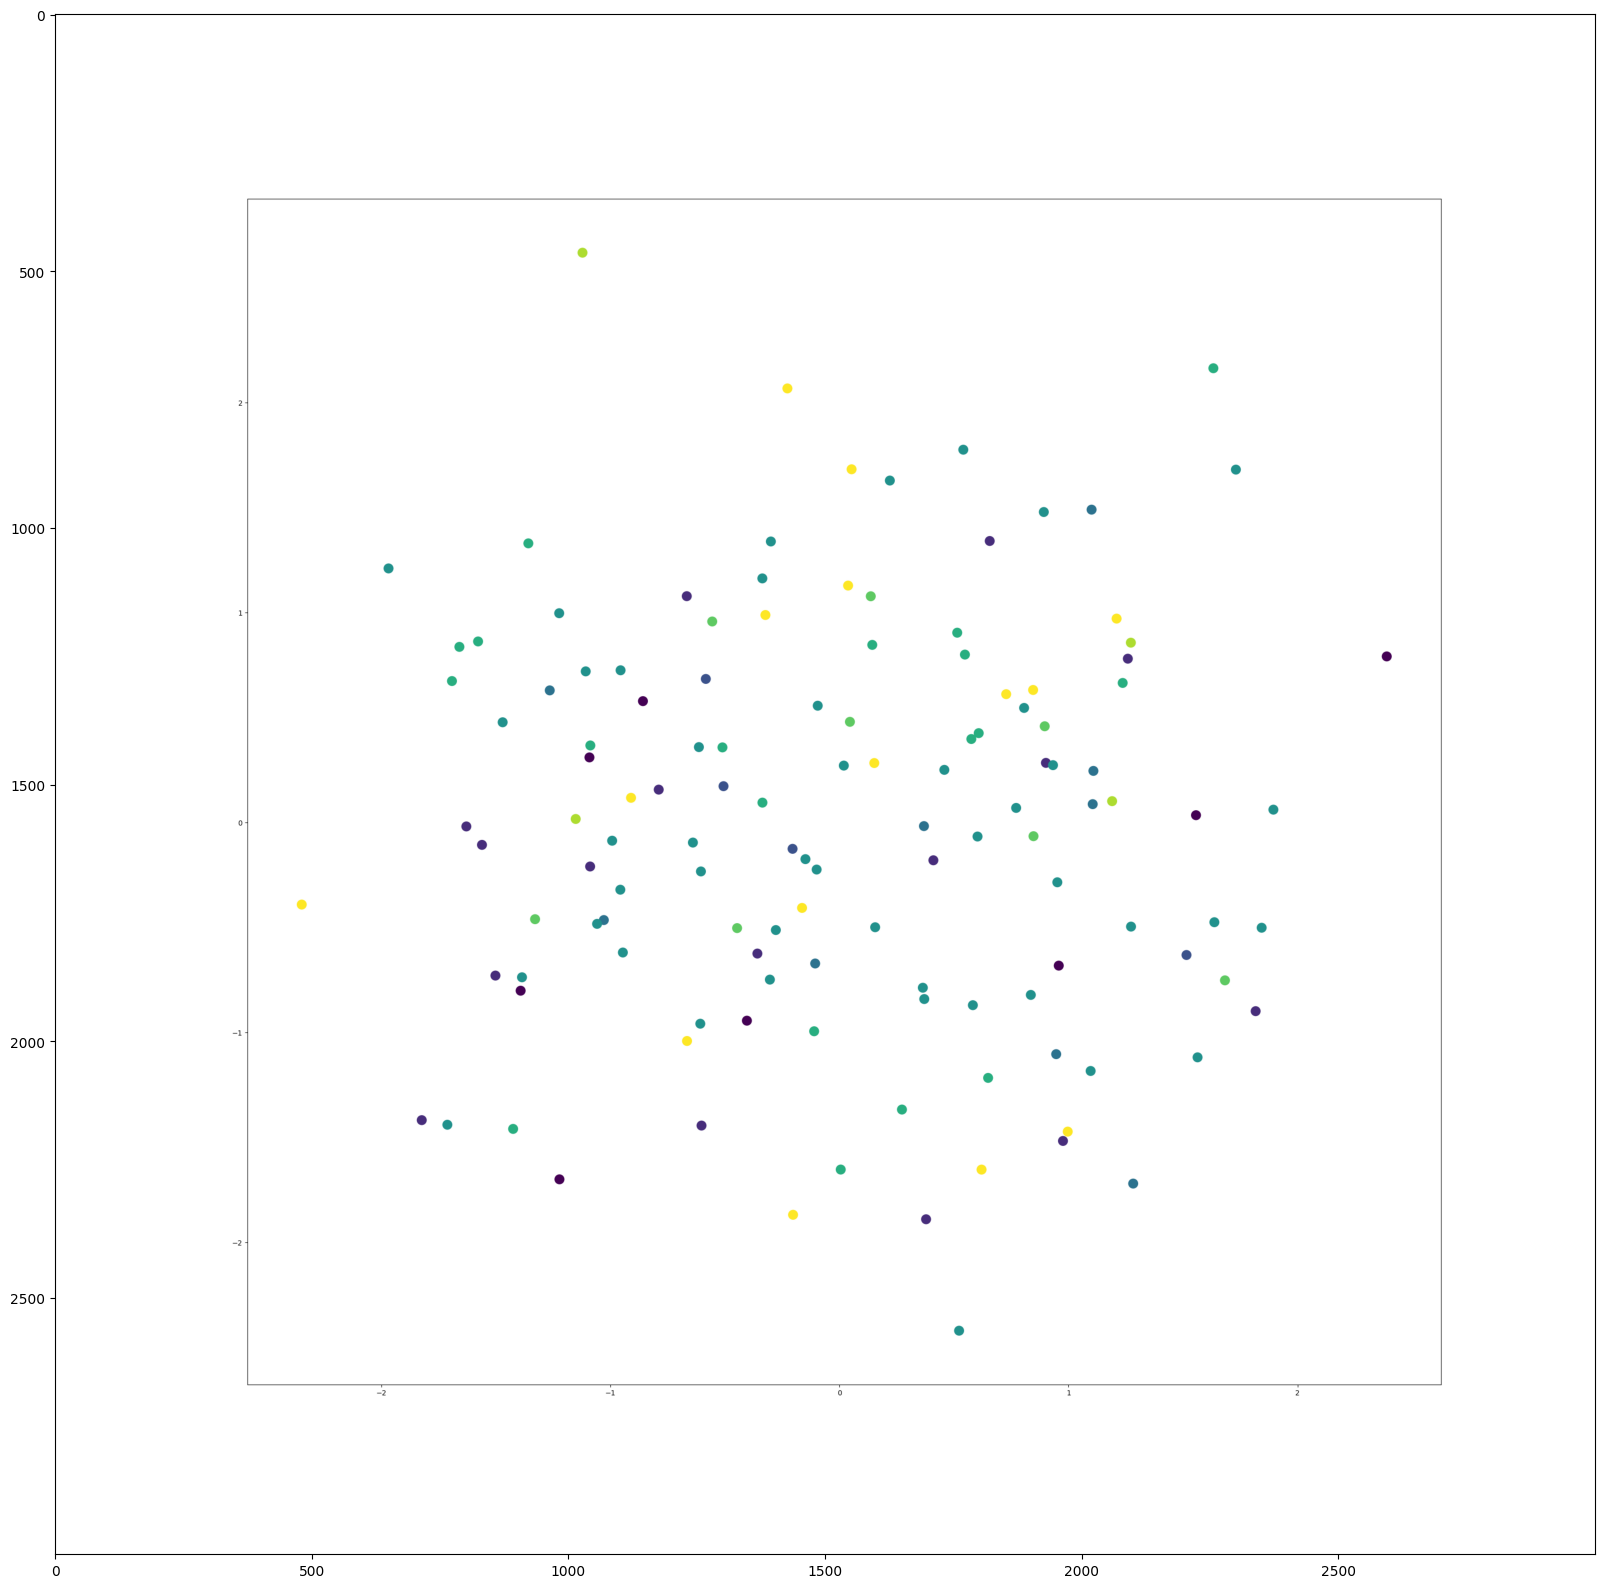

In [116]:
utils.show_image('outs/custom_vae/pca_scatter_1_donor_id.png')

### 2-PCA for 32-latent_dim custom VAE, coloured site

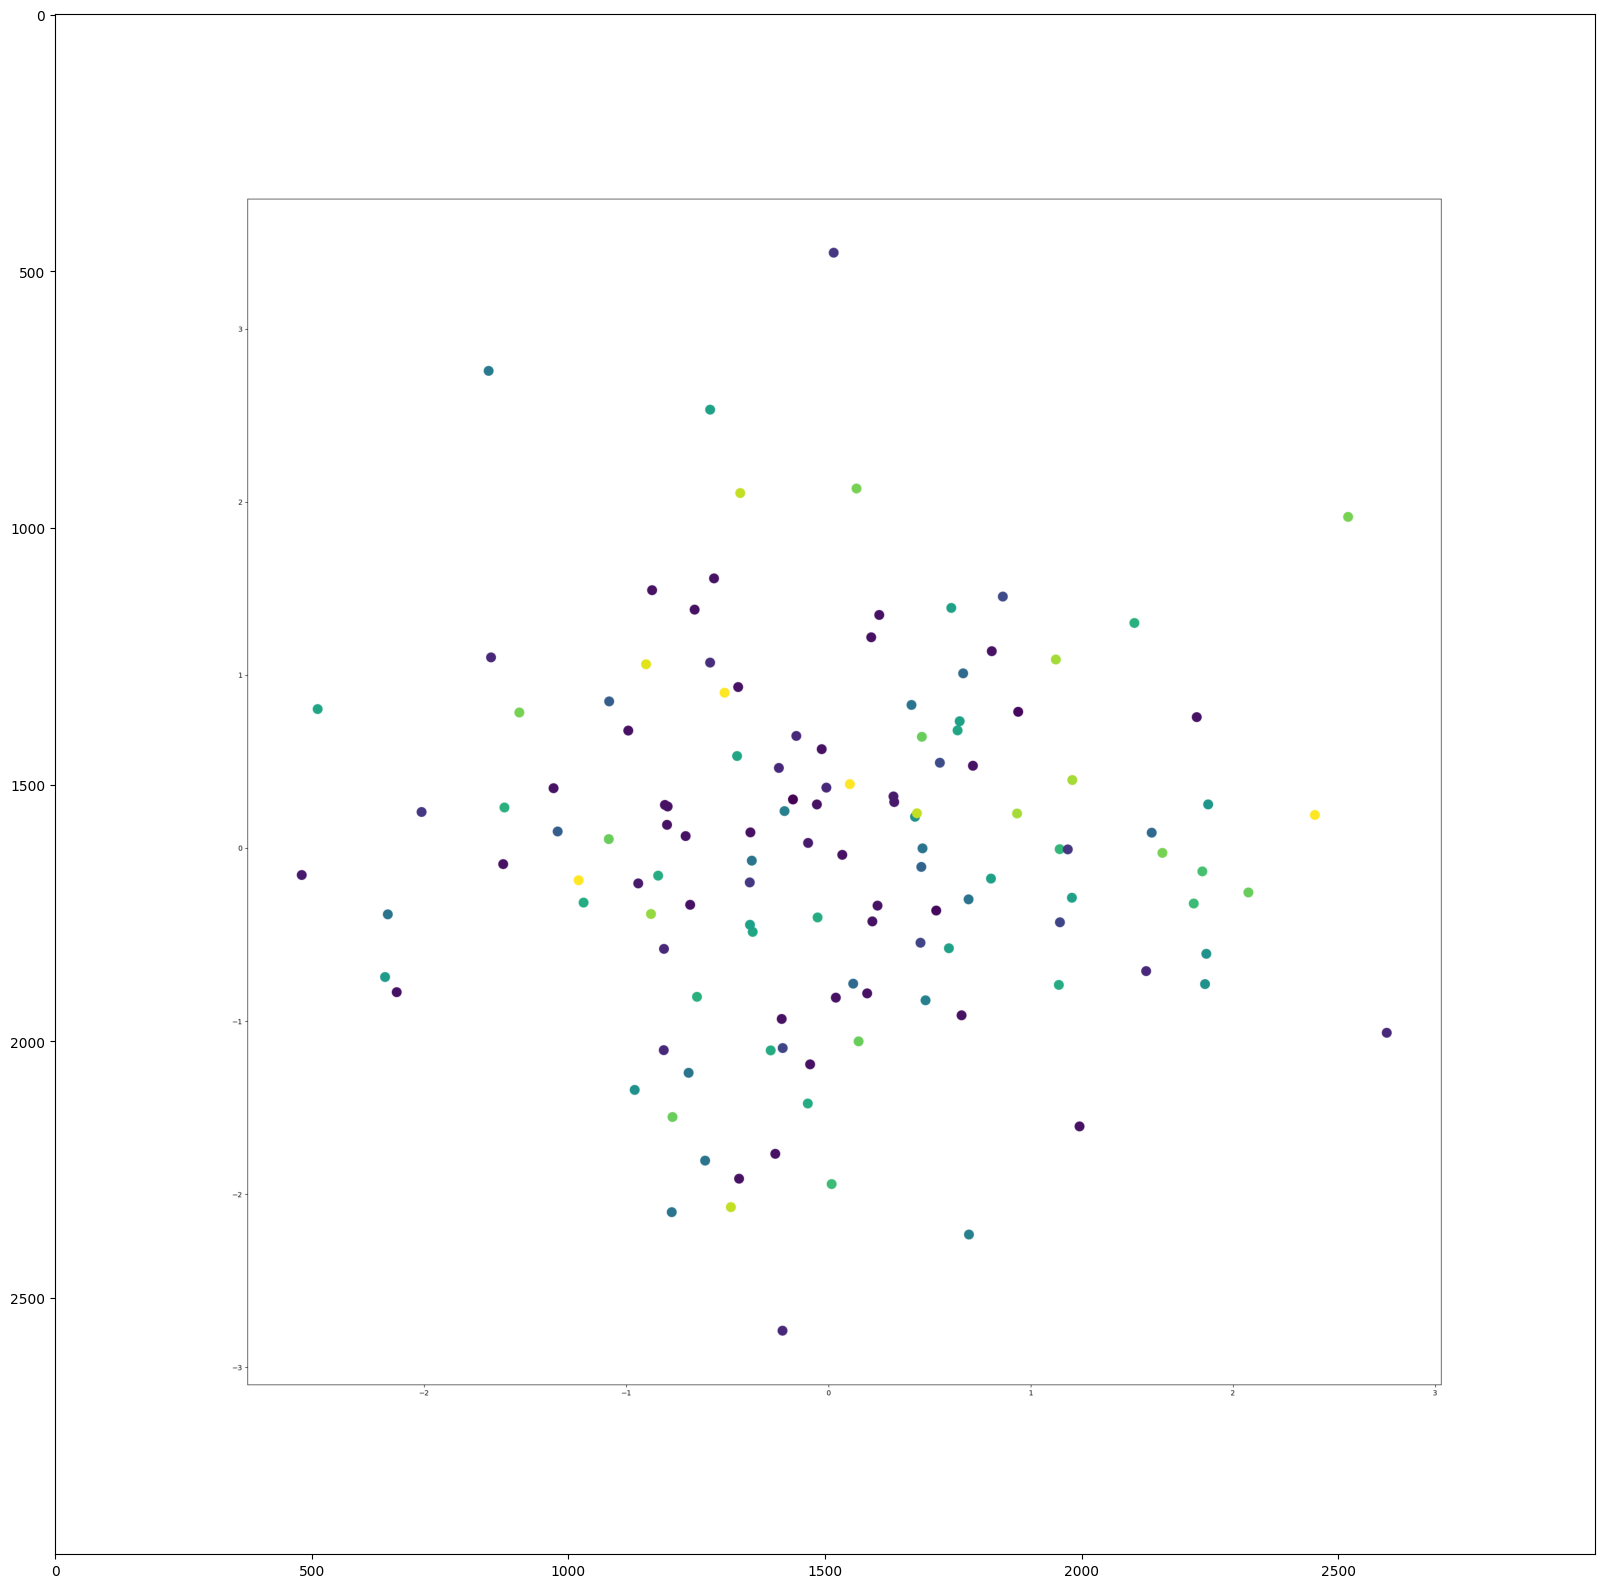

In [117]:
utils.show_image('outs/custom_vae/pca_scatter_1_site.png')

### I took one-hot encoded site and concatenated it to the latent variables, fed into the decoder

#### ELBO

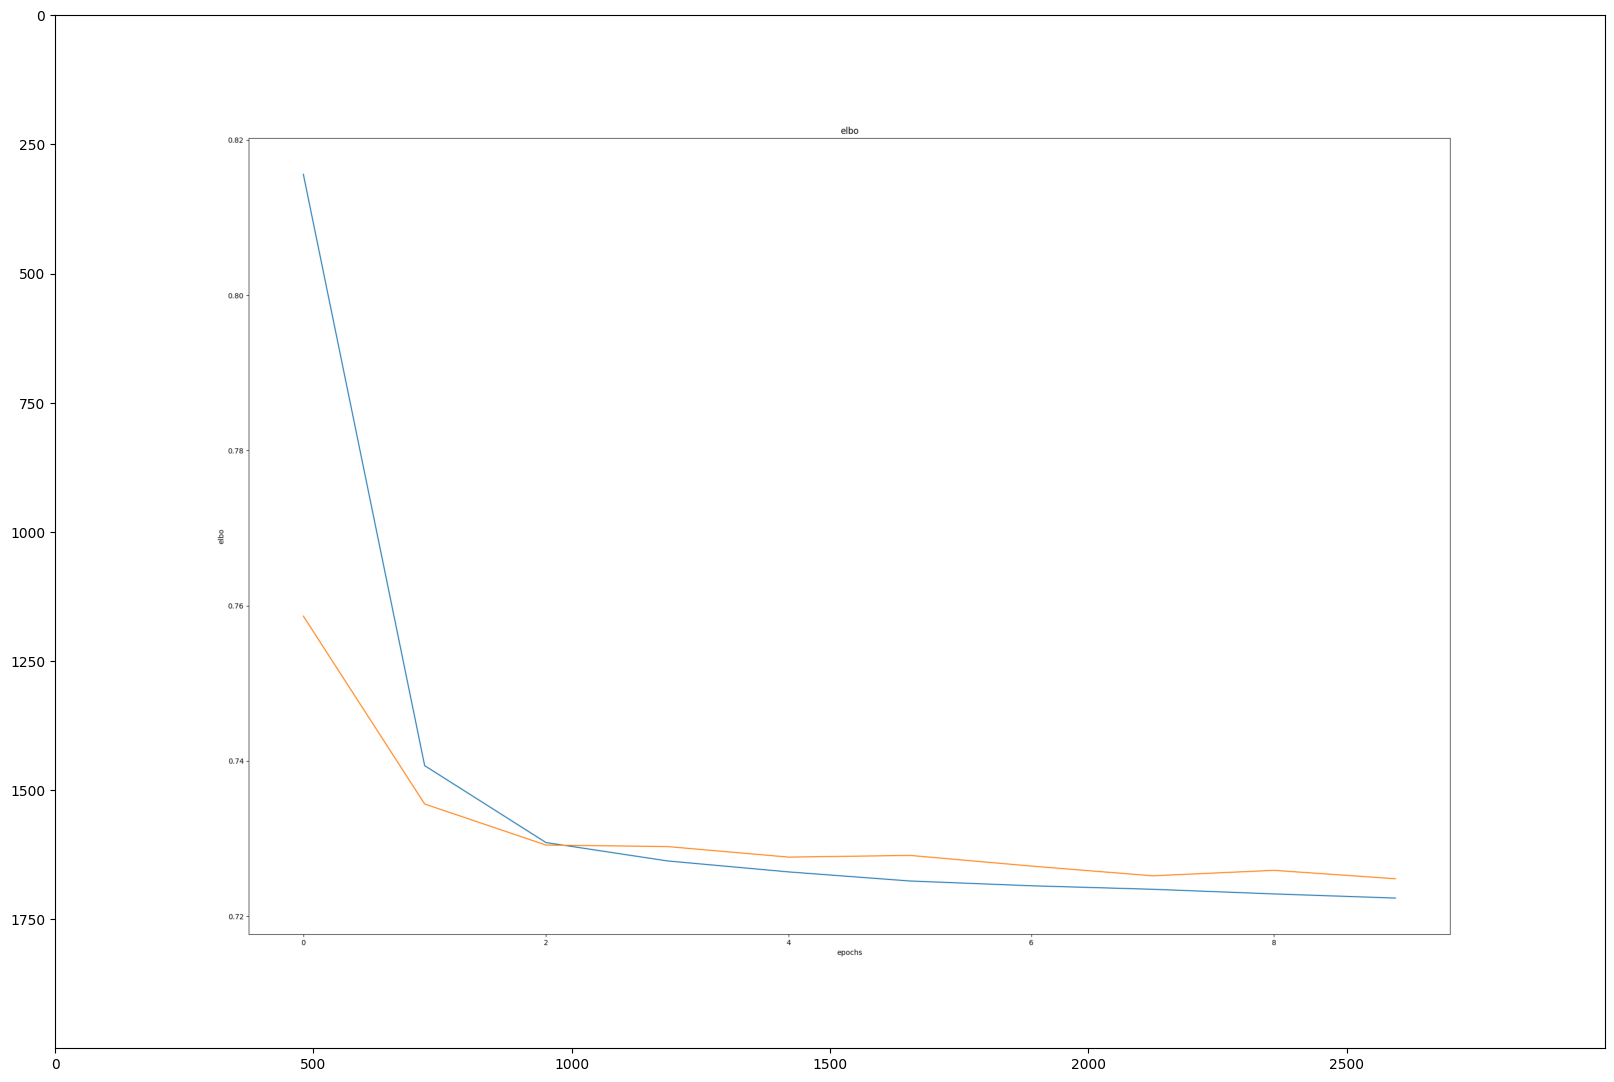

In [118]:
utils.show_image('outs/custom_vae/elbo_1s.png')

#### reconstruction loss

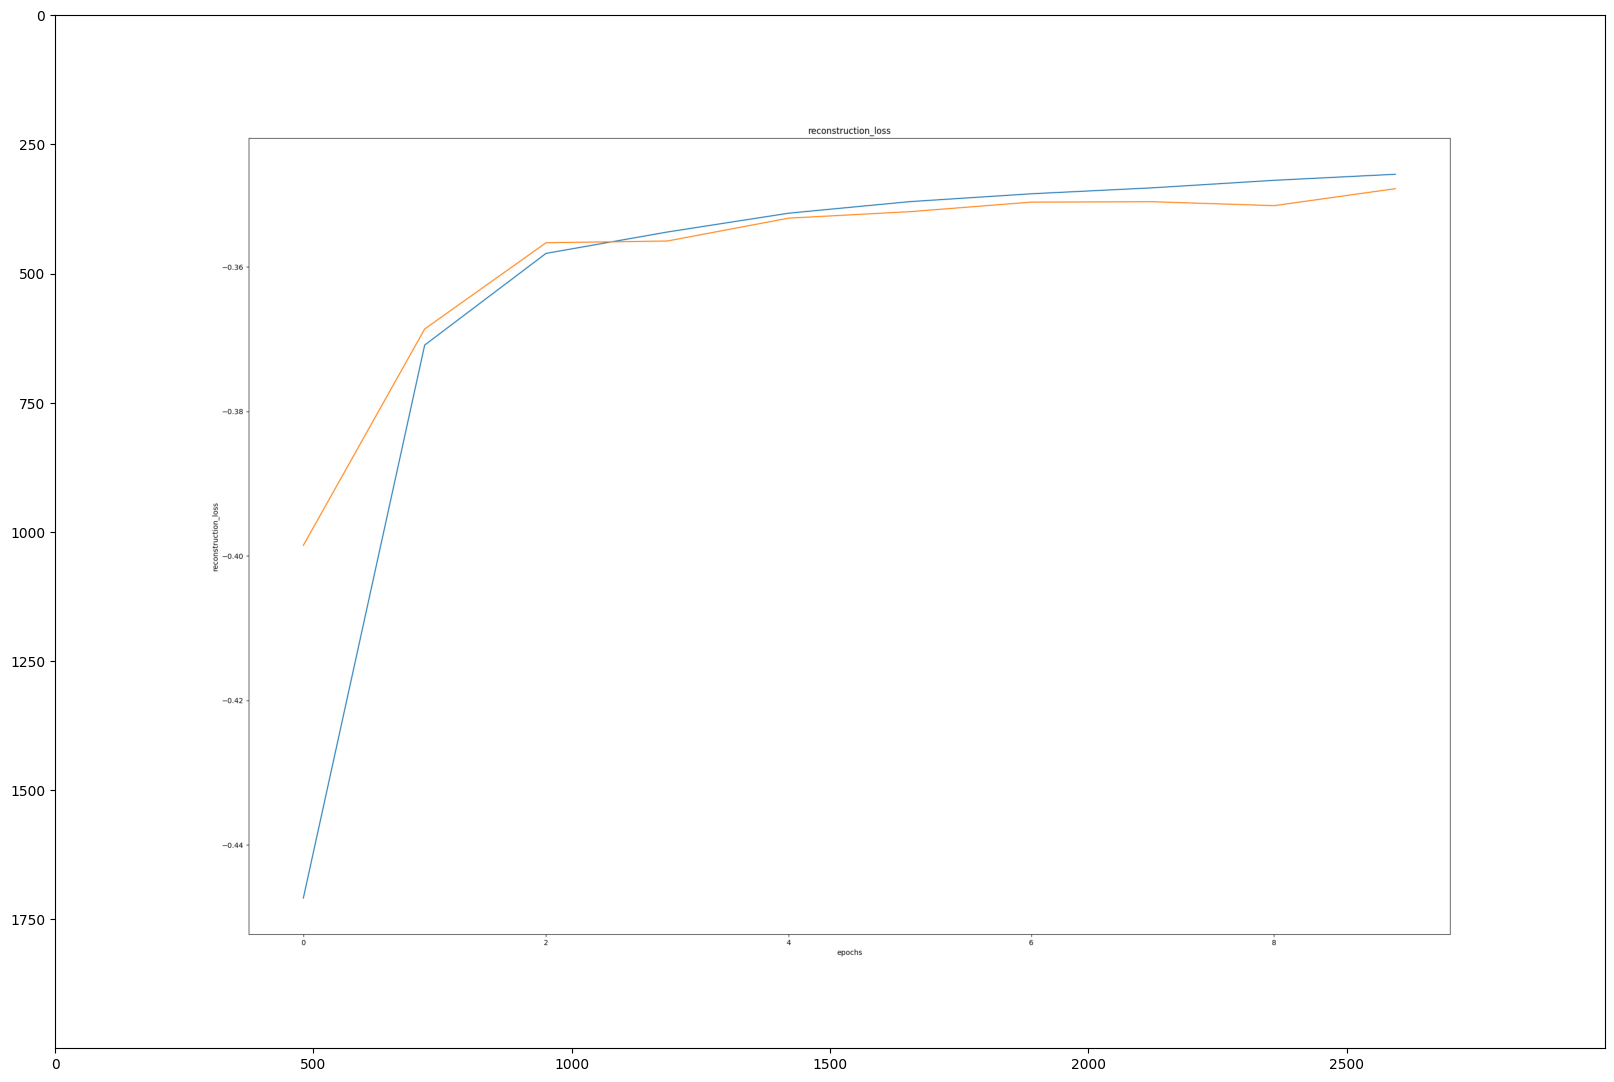

In [119]:
utils.show_image('outs/custom_vae/reconstruction_loss_1s.png')

#### KL divergence

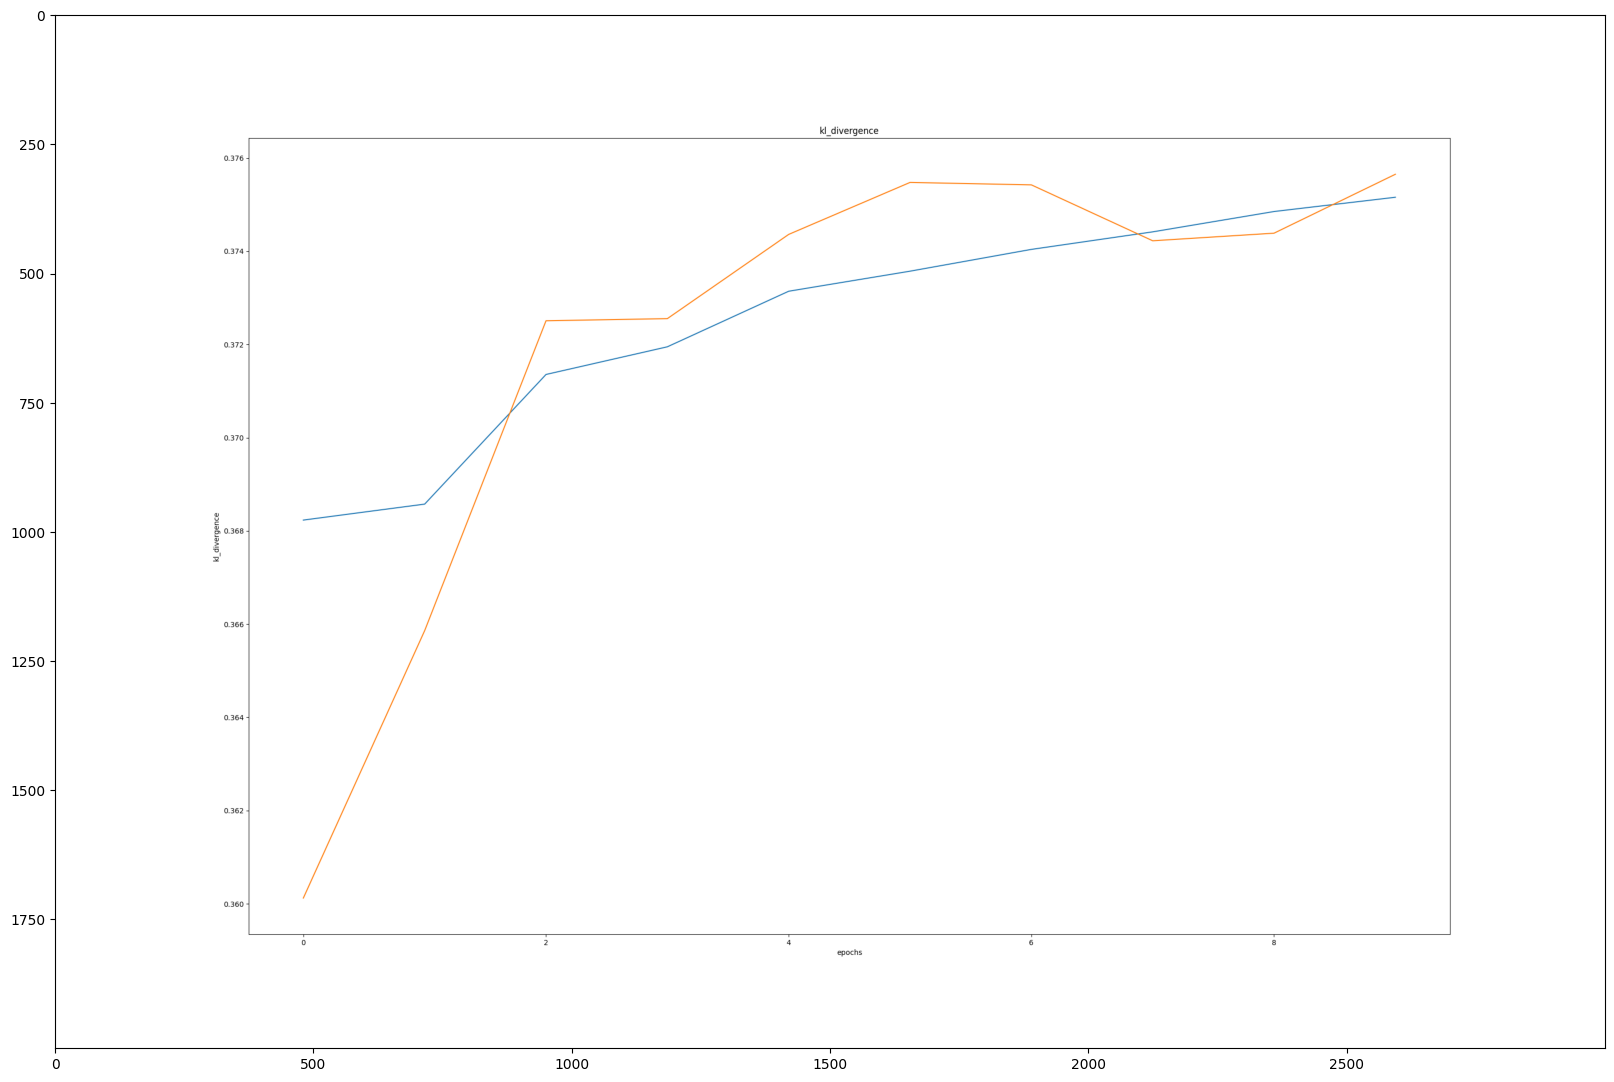

In [121]:
utils.show_image('outs/custom_vae/kl_divergence_1s.png')

### 2-PCA, coloured cell type

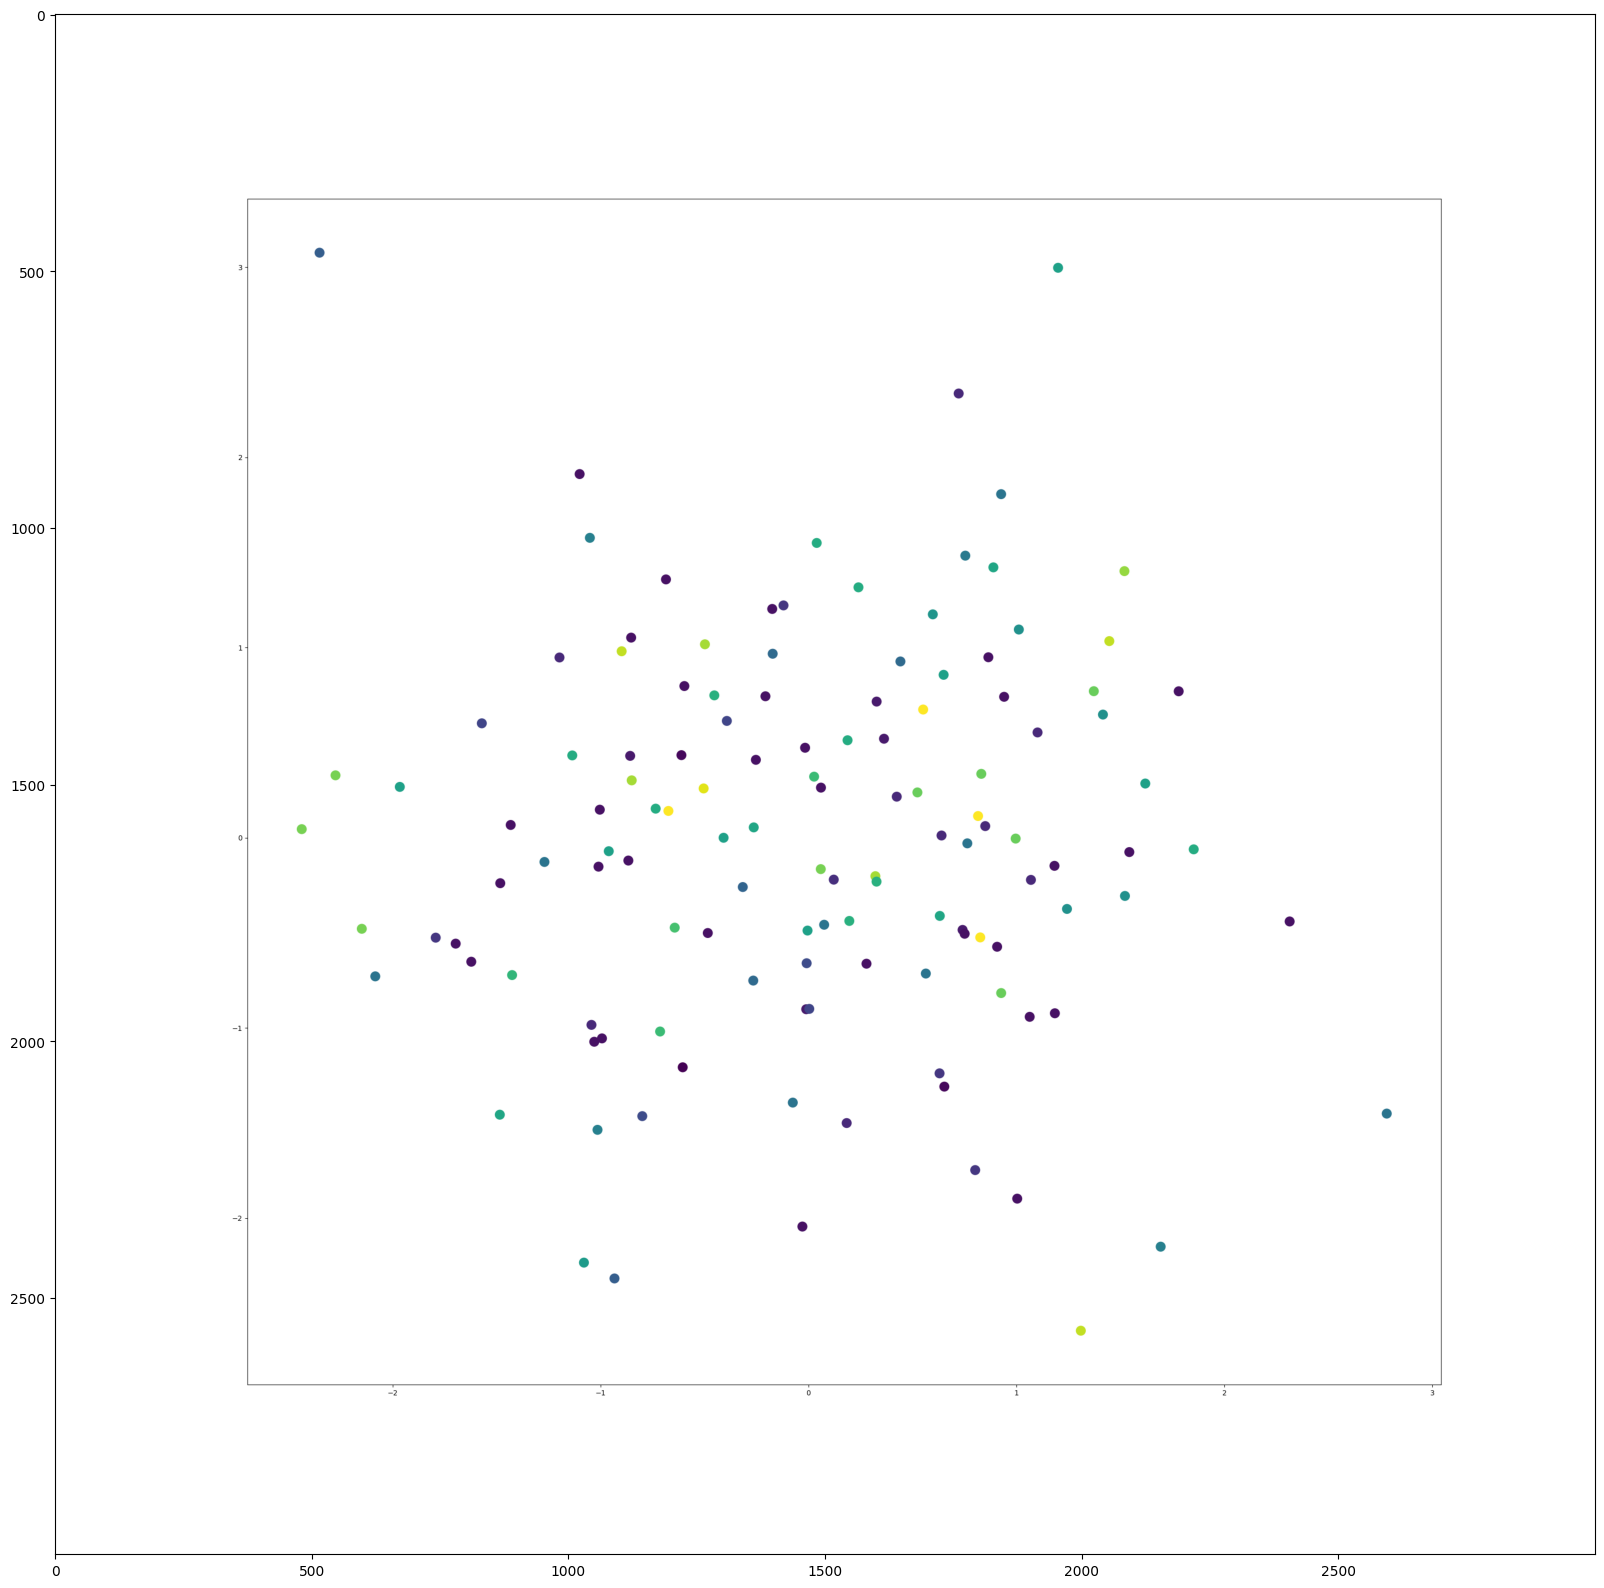

In [123]:
utils.show_image('outs/custom_vae/pca_scatter_1s_cell_type.png')